# **<u> FLIGHT FARE PREDICTION </u>**
#### - **Sidharth A**

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

Use relevant machine model to predict the Flight Fare.

# Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [97]:
#importing dataset
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis

**Airline:** The name of the airline.

**Date_of_Journey:** The date of the journey

**Source:** The source from which the service begins.

**Destination:** The destination where the service ends.

**Route:** The route taken by the flight to reach the destination.

**Dep_Time:** The time when the journey starts from the source.

**Arrival_Time:** Time of arrival at the destination.

**Duration:** Total duration of the flight.

**Total_Stops:** Total stops between the source and destination.

**Additional_Info:** Additional information about the flight

**Price:** The price of the ticket 

# Basic Checks

In [98]:
#columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [99]:
#checking total records
print('Total number of rows :',data.shape[0])
print('Total number of rows :',data.shape[1])

Total number of rows : 10683
Total number of rows : 11


In [100]:
#checking datatypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Insights
* All are objects except target variable

In [101]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [102]:
#missing values
data.isnull().sum()
#There are missing values in 'Route' and 'Total_Stops'

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights
* There are missing values in 'Route' and 'Total_Stops'

In [103]:
#unique values
for i in data.columns:
    print(data[i].unique())
    print('----------------------------')
    print(data[i].value_counts())
    print('****************************')

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019

#### Insights

* In 'Destination' feature, there are 2 values for 'Delhi'.
* Same as in 'Additional' info, there are two values for 'No Info'.

### Converting date and time columns from object to date and time

In [104]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])

In [105]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [106]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-31 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-31 05:50:00,2023-07-31 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-31 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-07-31 18:05:00,2023-07-31 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-07-31 16:50:00,2023-07-31 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-07-31 19:55:00,2023-07-31 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-07-31 20:45:00,2023-07-31 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-07-31 08:20:00,2023-07-31 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-07-31 11:30:00,2023-07-31 14:10:00,2h 40m,non-stop,No info,12648


In [107]:
#Extracting necessary values from 'Date_of_Journey','Dep_Time' and 'Arrival_Time'

#creating 'Journey_day' and 'Journey_month' features from date of journey
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.month

#creating 'Dep_hour' and 'Dep_min' from 'Dep_Time'
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

#creating 'Arrival_hour' and 'Arrival_min' from 'Arrival_time'
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

#dropping all 3 main columns

data.drop(['Date_of_Journey','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [108]:
#converting duration into total minutes
data.Duration=data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [109]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,3,1,11,30,14,10


In [110]:
#creating separate list for numerical and categorical columns
numerical=[]
categorical=[]

for i in data.columns:
    if data[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('Numerical features :',numerical)
print('Categorical features :',categorical)

Numerical features : ['Duration', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
Categorical features : ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [111]:
#Replacing 'New Delhi' as 'Delhi' in Destination column
data.Destination = data.Destination.replace('New Delhi','Delhi')

#similarly replacing 'No Info' as 'No info' in Additional_info column
data.Additional_Info = data.Additional_Info.replace('No Info','No info')

In [112]:
#checking duplicated values
data.duplicated().sum()

222

#### Insights
* There are total 222 duplicated records in the dataset

In [113]:
#### Insights
* There are total 222 duplicated records in the dataset#droping duplicated values
data.drop_duplicates(inplace=True)

In [114]:
#records after dropping duplicated values
data.shape

(10461, 14)

In [115]:
#There are missing values in two categorical columns : Route, Total_Stops
#since its categorical, imputing the missing values with mode
data.loc[data.Route.isnull(),'Route']=data.Route.mode()[0]
data.loc[data.Total_Stops.isnull(),'Total_Stops']=data.Total_Stops.mode()[0]

In [116]:
#checking missing values after imputation
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

In [117]:
#checking stats for numerical features
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Journey_day,10461.000000,12.629194,8.791165,3.000000,5.000000,6.000000,21.000000,27.000000
Journey_month,10461.000000,5.535130,2.995285,1.000000,3.000000,5.000000,6.000000,12.000000
Dep_hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000


In [118]:
#checking missing values for categorical features
data.describe(include='O')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10461,10461,10461,10461,10461,10461
unique,12,5,5,128,5,9
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3700,4346,4346,2377,5626,8184


### Insights

* The minimum ticket price is 1759 rupees and the maximum ticket price is 79512 rupees.
* The minimum duration of the journey is 5 minutes and maximum duration is about 48 hours.
* Outliers are present in duration and price columns as we can see huge difference between 75% and max value.
* More people opted for jet airways.
* Almost 40% people were from Delhi.
* Almost 40% people travelled to Cochin.
* Std Deviations are higher which indicates spread of data.

# EDA

### Flight Distribution source wise

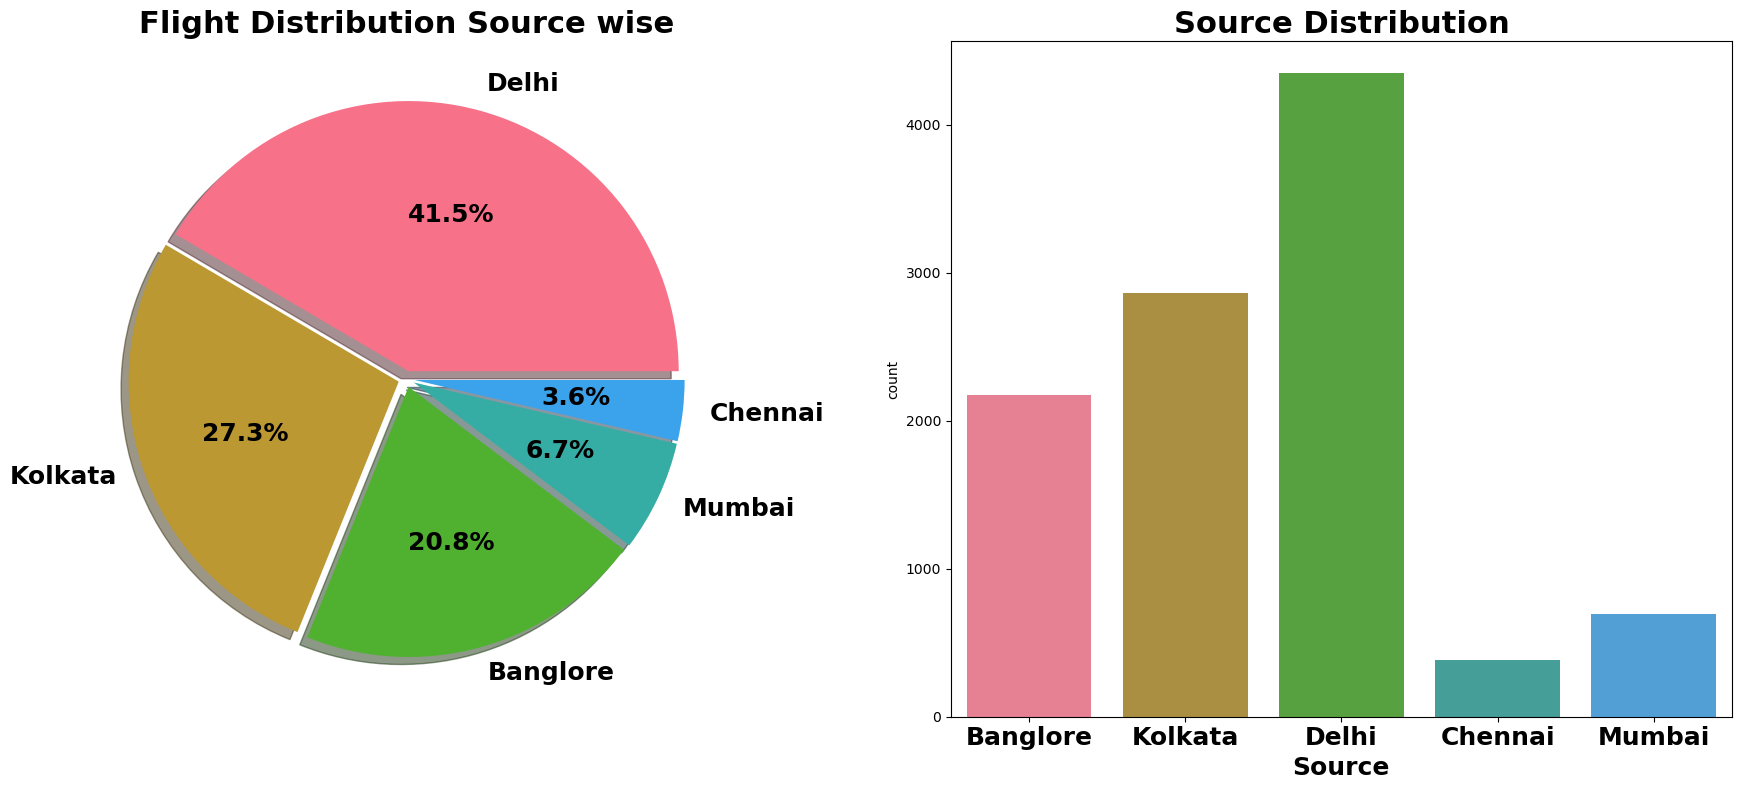

In [119]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Source',data=data,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Insights
* Most of the people were from Delhi.
* There are very less people from Chennai.

### Flight distribution Destination wise

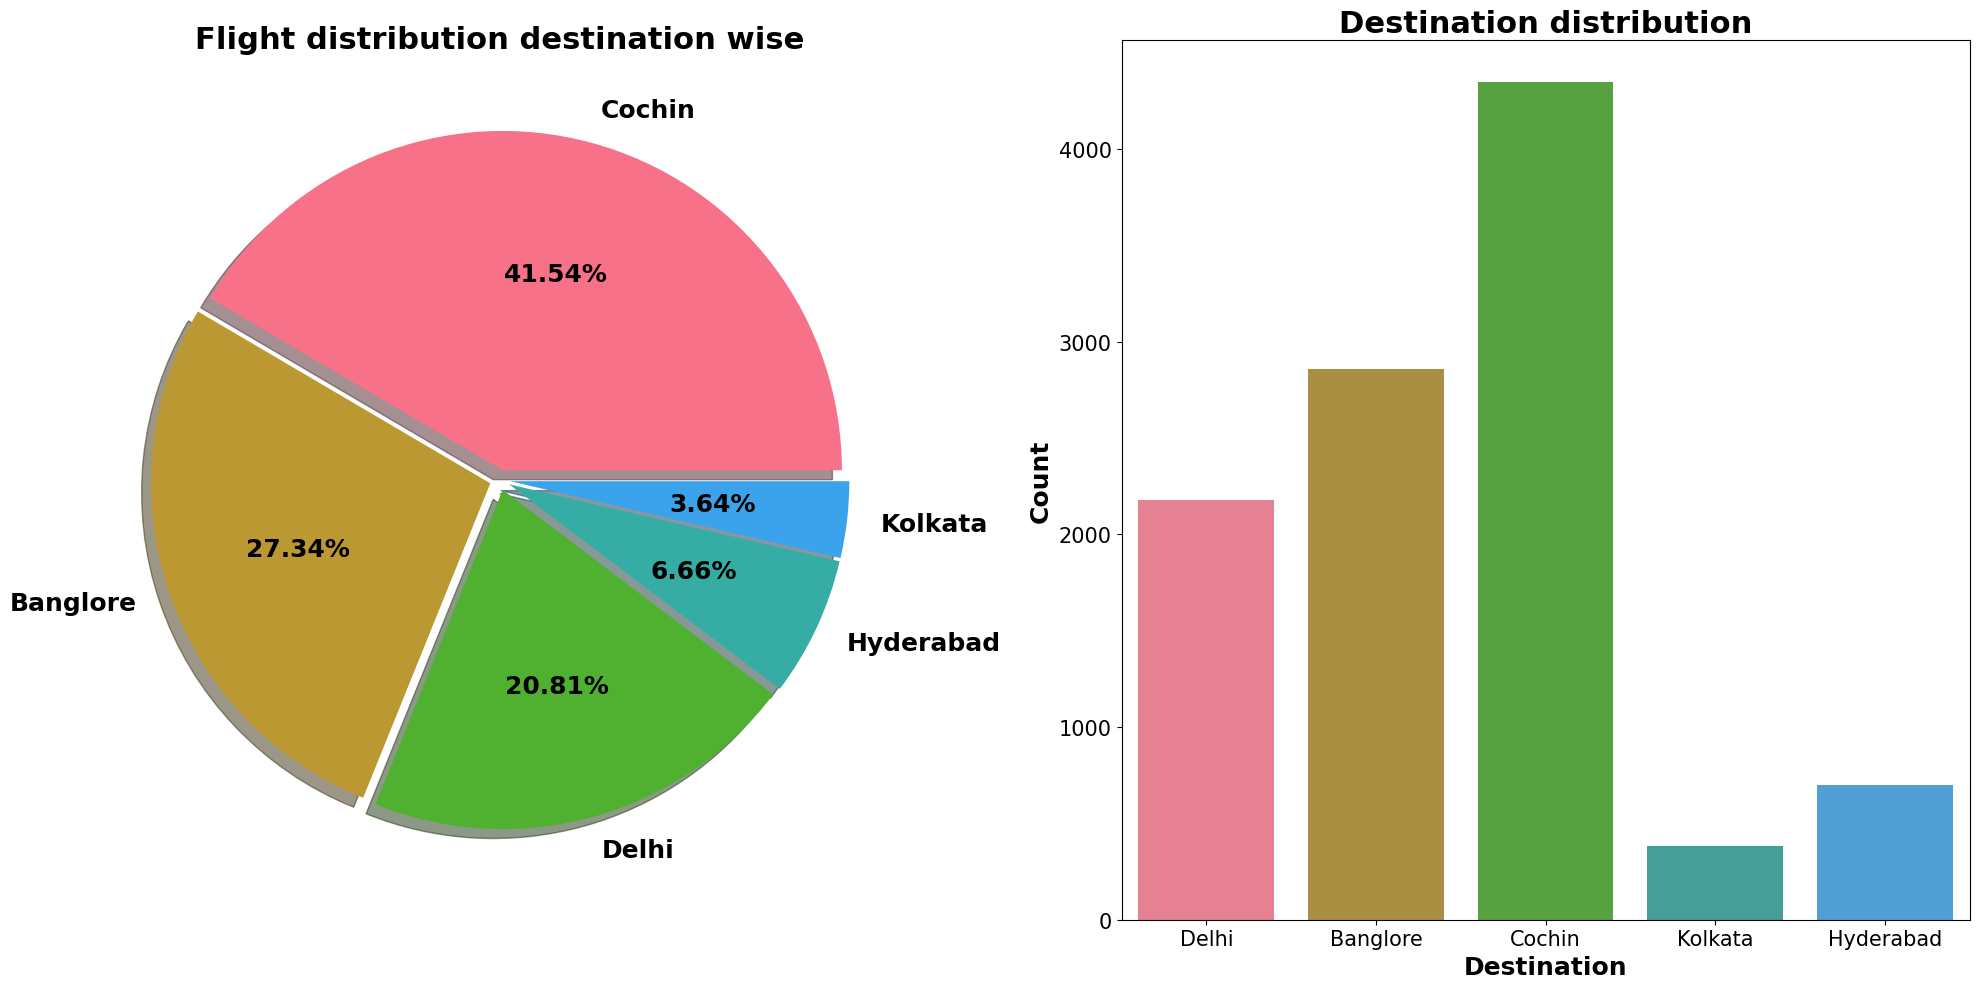

In [120]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(20,10))
data['Destination'].value_counts().plot.pie(explode=[.03,.03,.03,.03,.03],autopct='%3.2f%%',
                                           textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Flight distribution destination wise',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Destination',data=data,ax=ax[1])
ax[1].set_title('Destination distribution',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Destination',fontsize=18,fontweight='bold')
ax[1].set_ylabel('Count',fontsize=18,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* More than 40% peole travelled to Cochin.
* Less than 60 people travelled to Kolkata.

### Source with respect to target variable

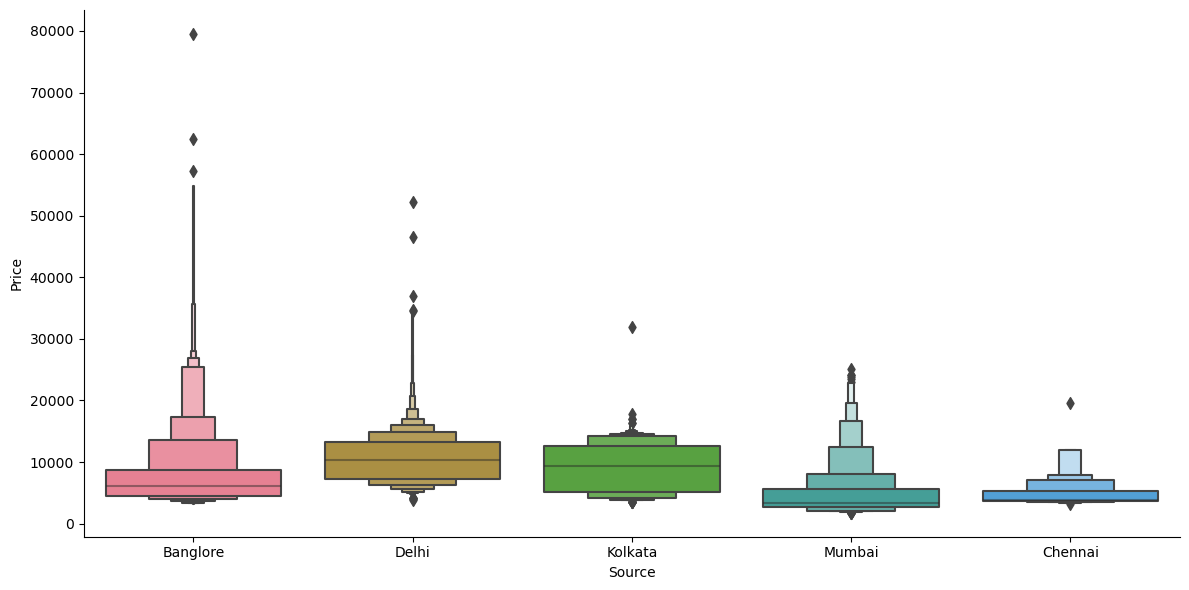

In [121]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.show()

#### Insights
* Maximum fare comes for Bangalore flight.
* The Chennai flight has the minimum fare.

### Destination with respect to target variable

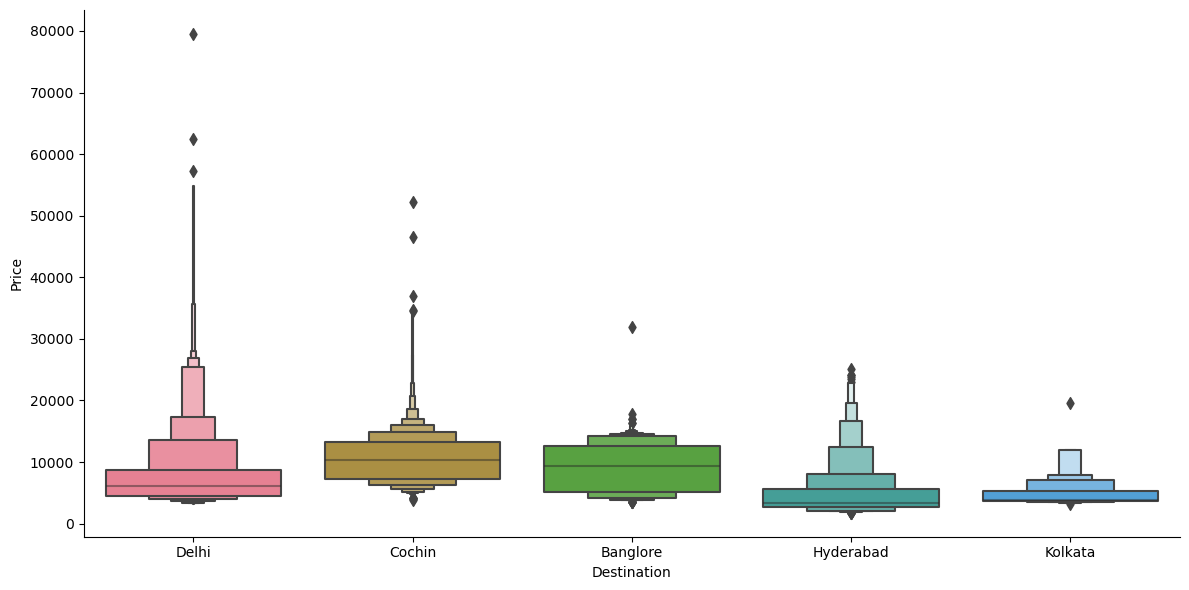

In [122]:
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.show()

#### Insights
* The flight ticket price to Delhi is the maximum. This maybe because of the most visited place is Delhi.

### Flight distribution as per Airline

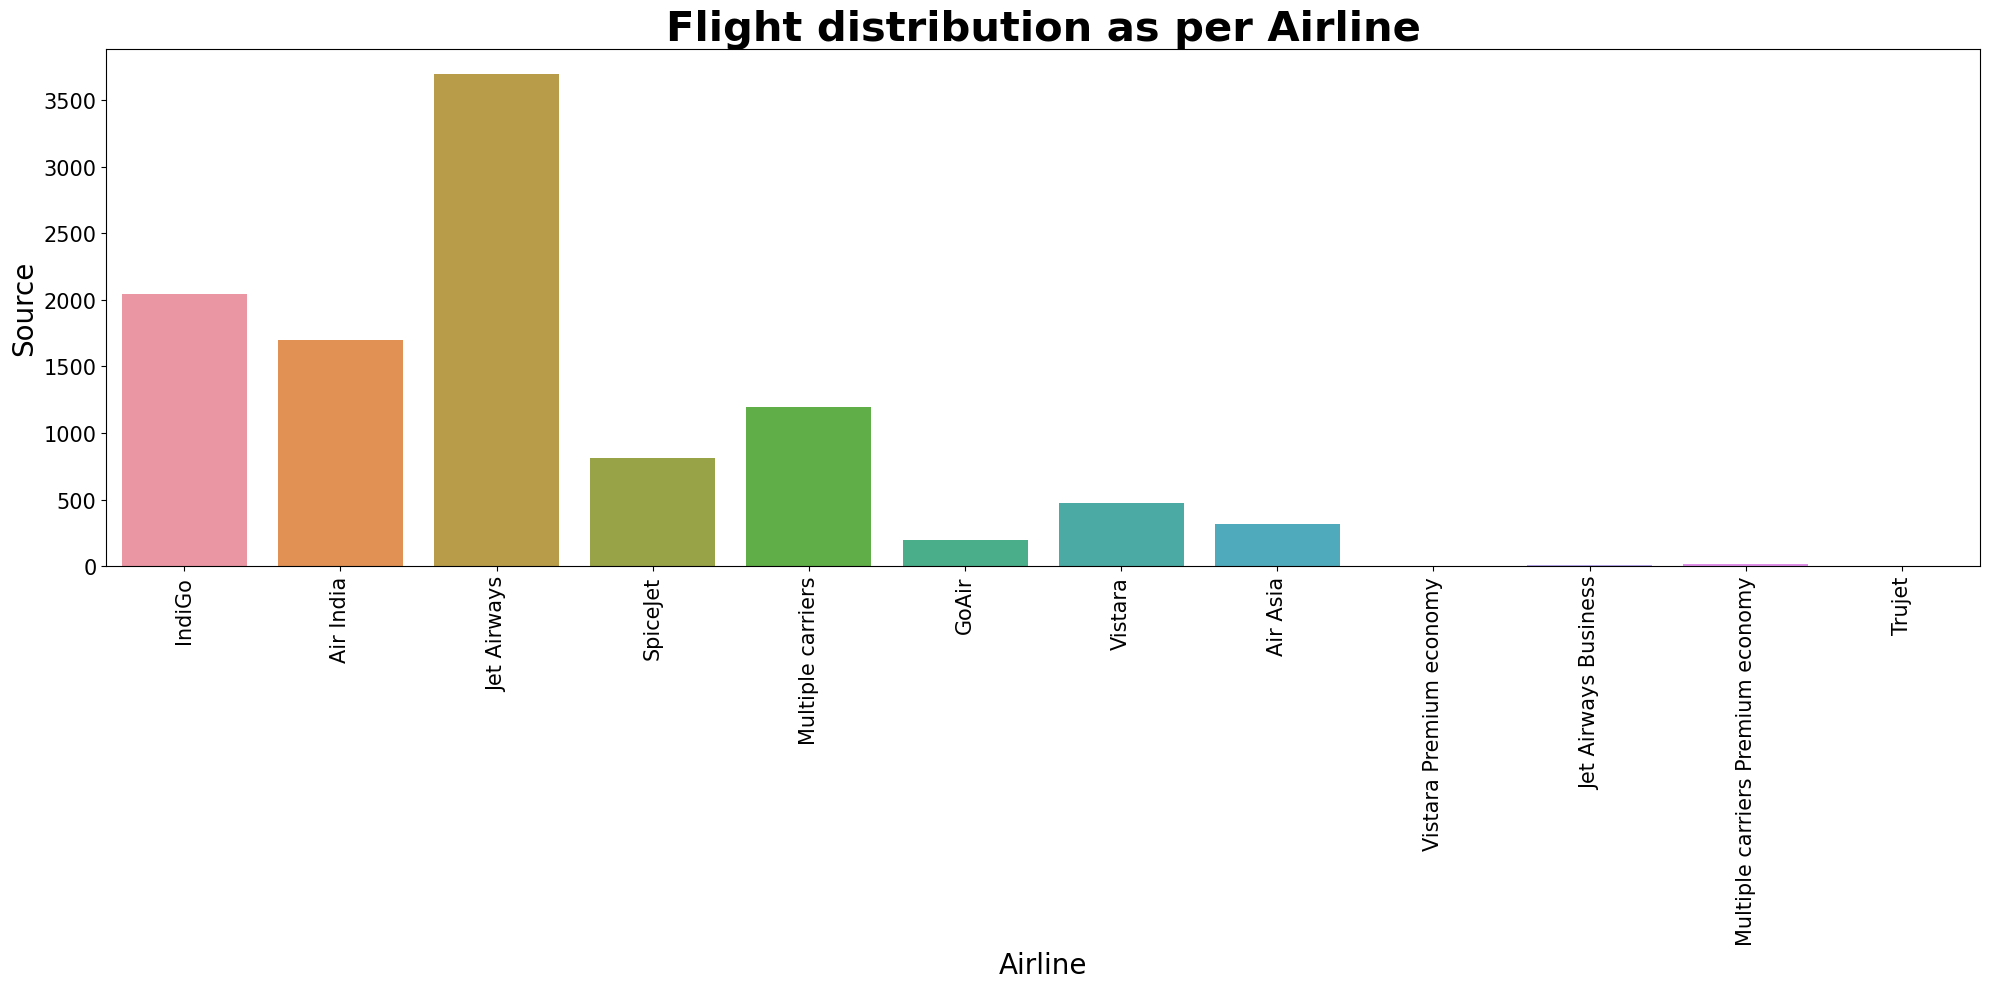

In [123]:
plt.figure(figsize=(20,10))
sns.countplot('Airline',data=data)
plt.title('Flight distribution as per Airline',fontsize=30,fontweight='bold')
plt.xlabel('Airline',fontsize=20)
plt.ylabel('Source',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* More people travelled via Jet airways.
* There are very few premium classes.

### Price according to the Airlines

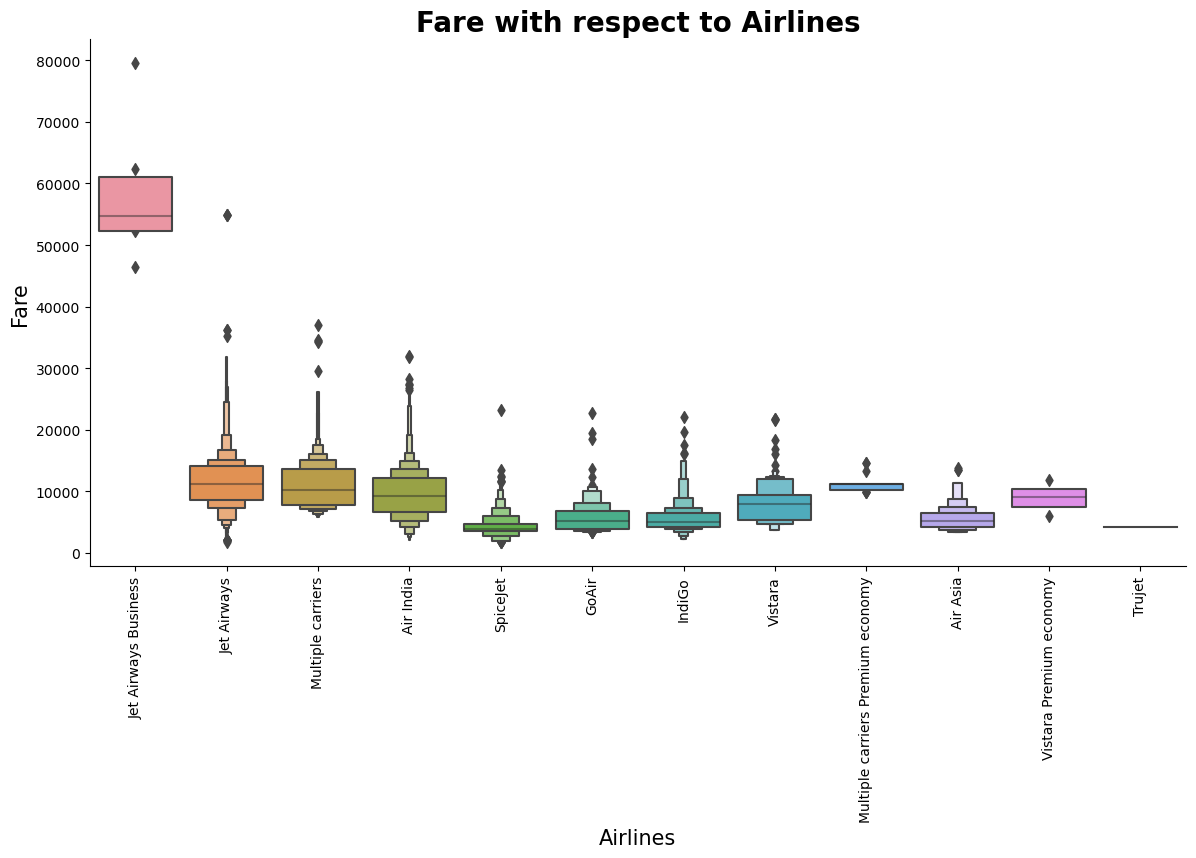

In [124]:
sns.catplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.title('Fare with respect to Airlines',fontsize=20,fontweight='bold')
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

#### Insights
* Among all airways, Jet airways has the maximum price.
* Goair and Indigo airlines have the similar ticket price.

### Duration and Price

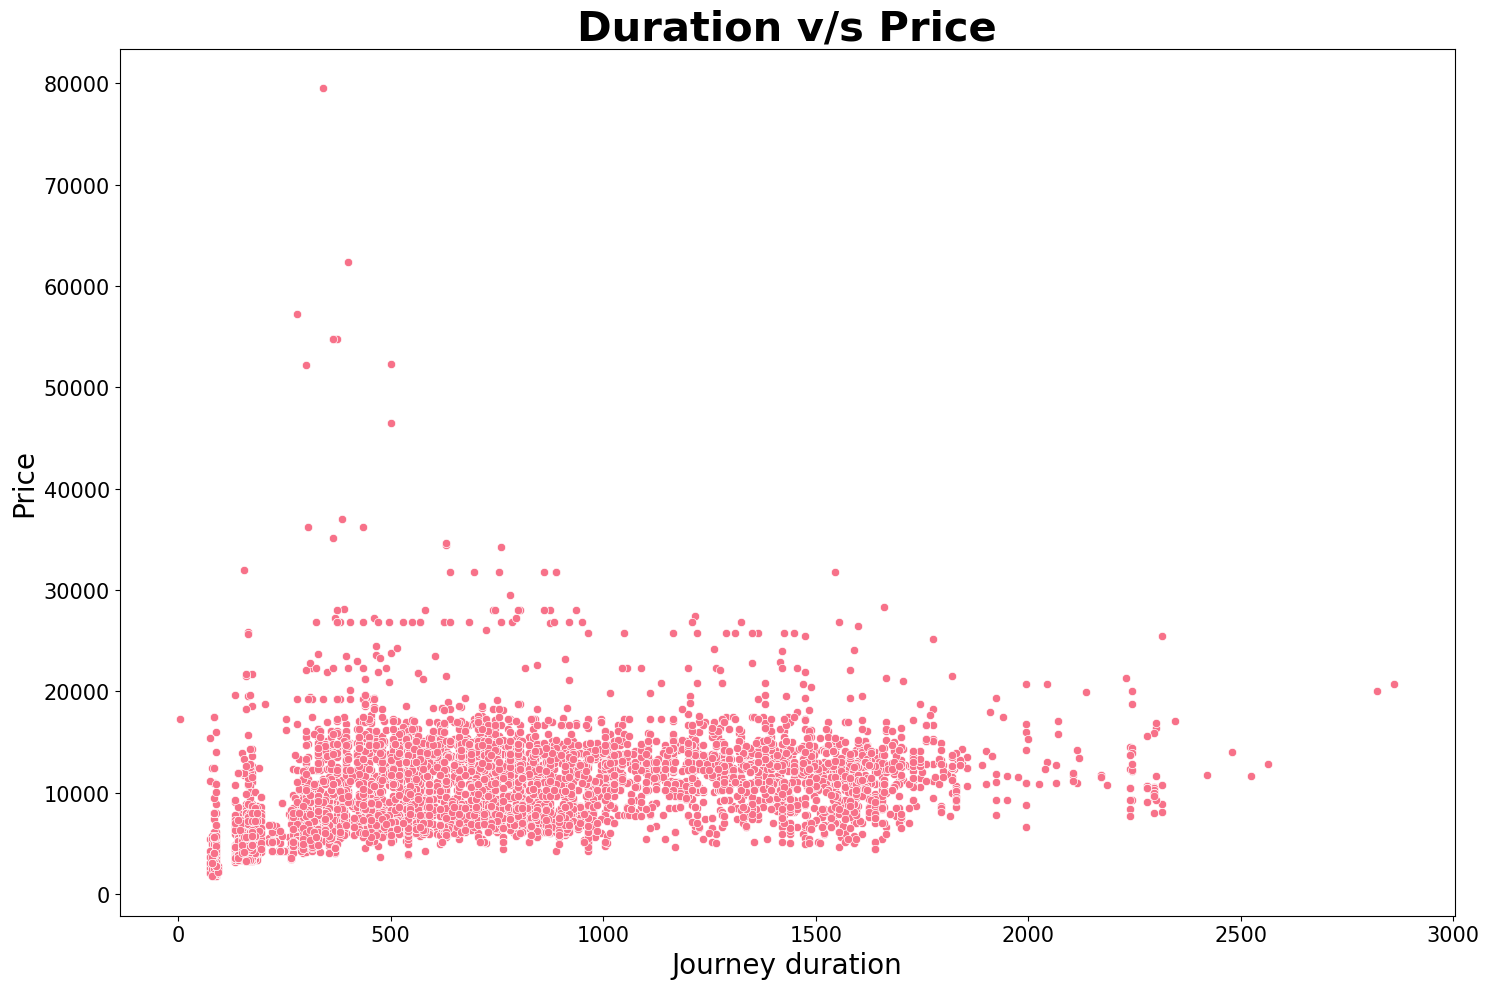

In [125]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Duration',y='Price',data=data)
plt.title('Duration v/s Price',fontsize=30,fontweight='bold')
plt.xlabel('Journey duration',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* Duration and price are usually directly proportional. But here we can't see any proportionality. This is maybe other factors affecting both of these.

### Total Stops v/s Price

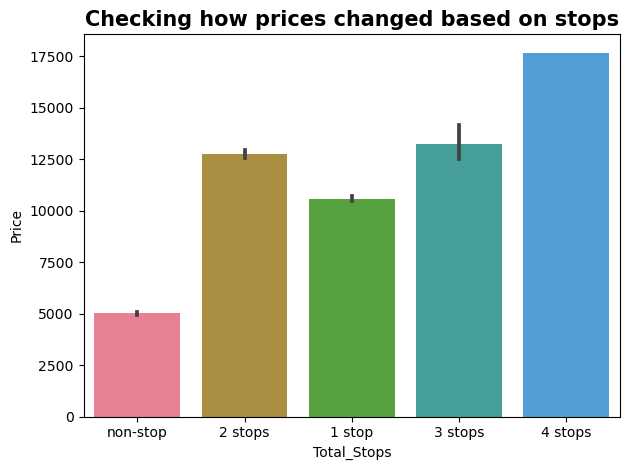

In [126]:
sns.barplot('Total_Stops','Price',data=data)
plt.title('Checking how prices changed based on stops',fontsize=15,fontweight='bold')
plt.show()

#### Insights
* As the number of stops increases, the fare also increases.
* 2 stops and 3 stops flight fare has only less than 5000 rupees difference.

### Journey day, Journey month, Dep hour and Dep min v/s Price

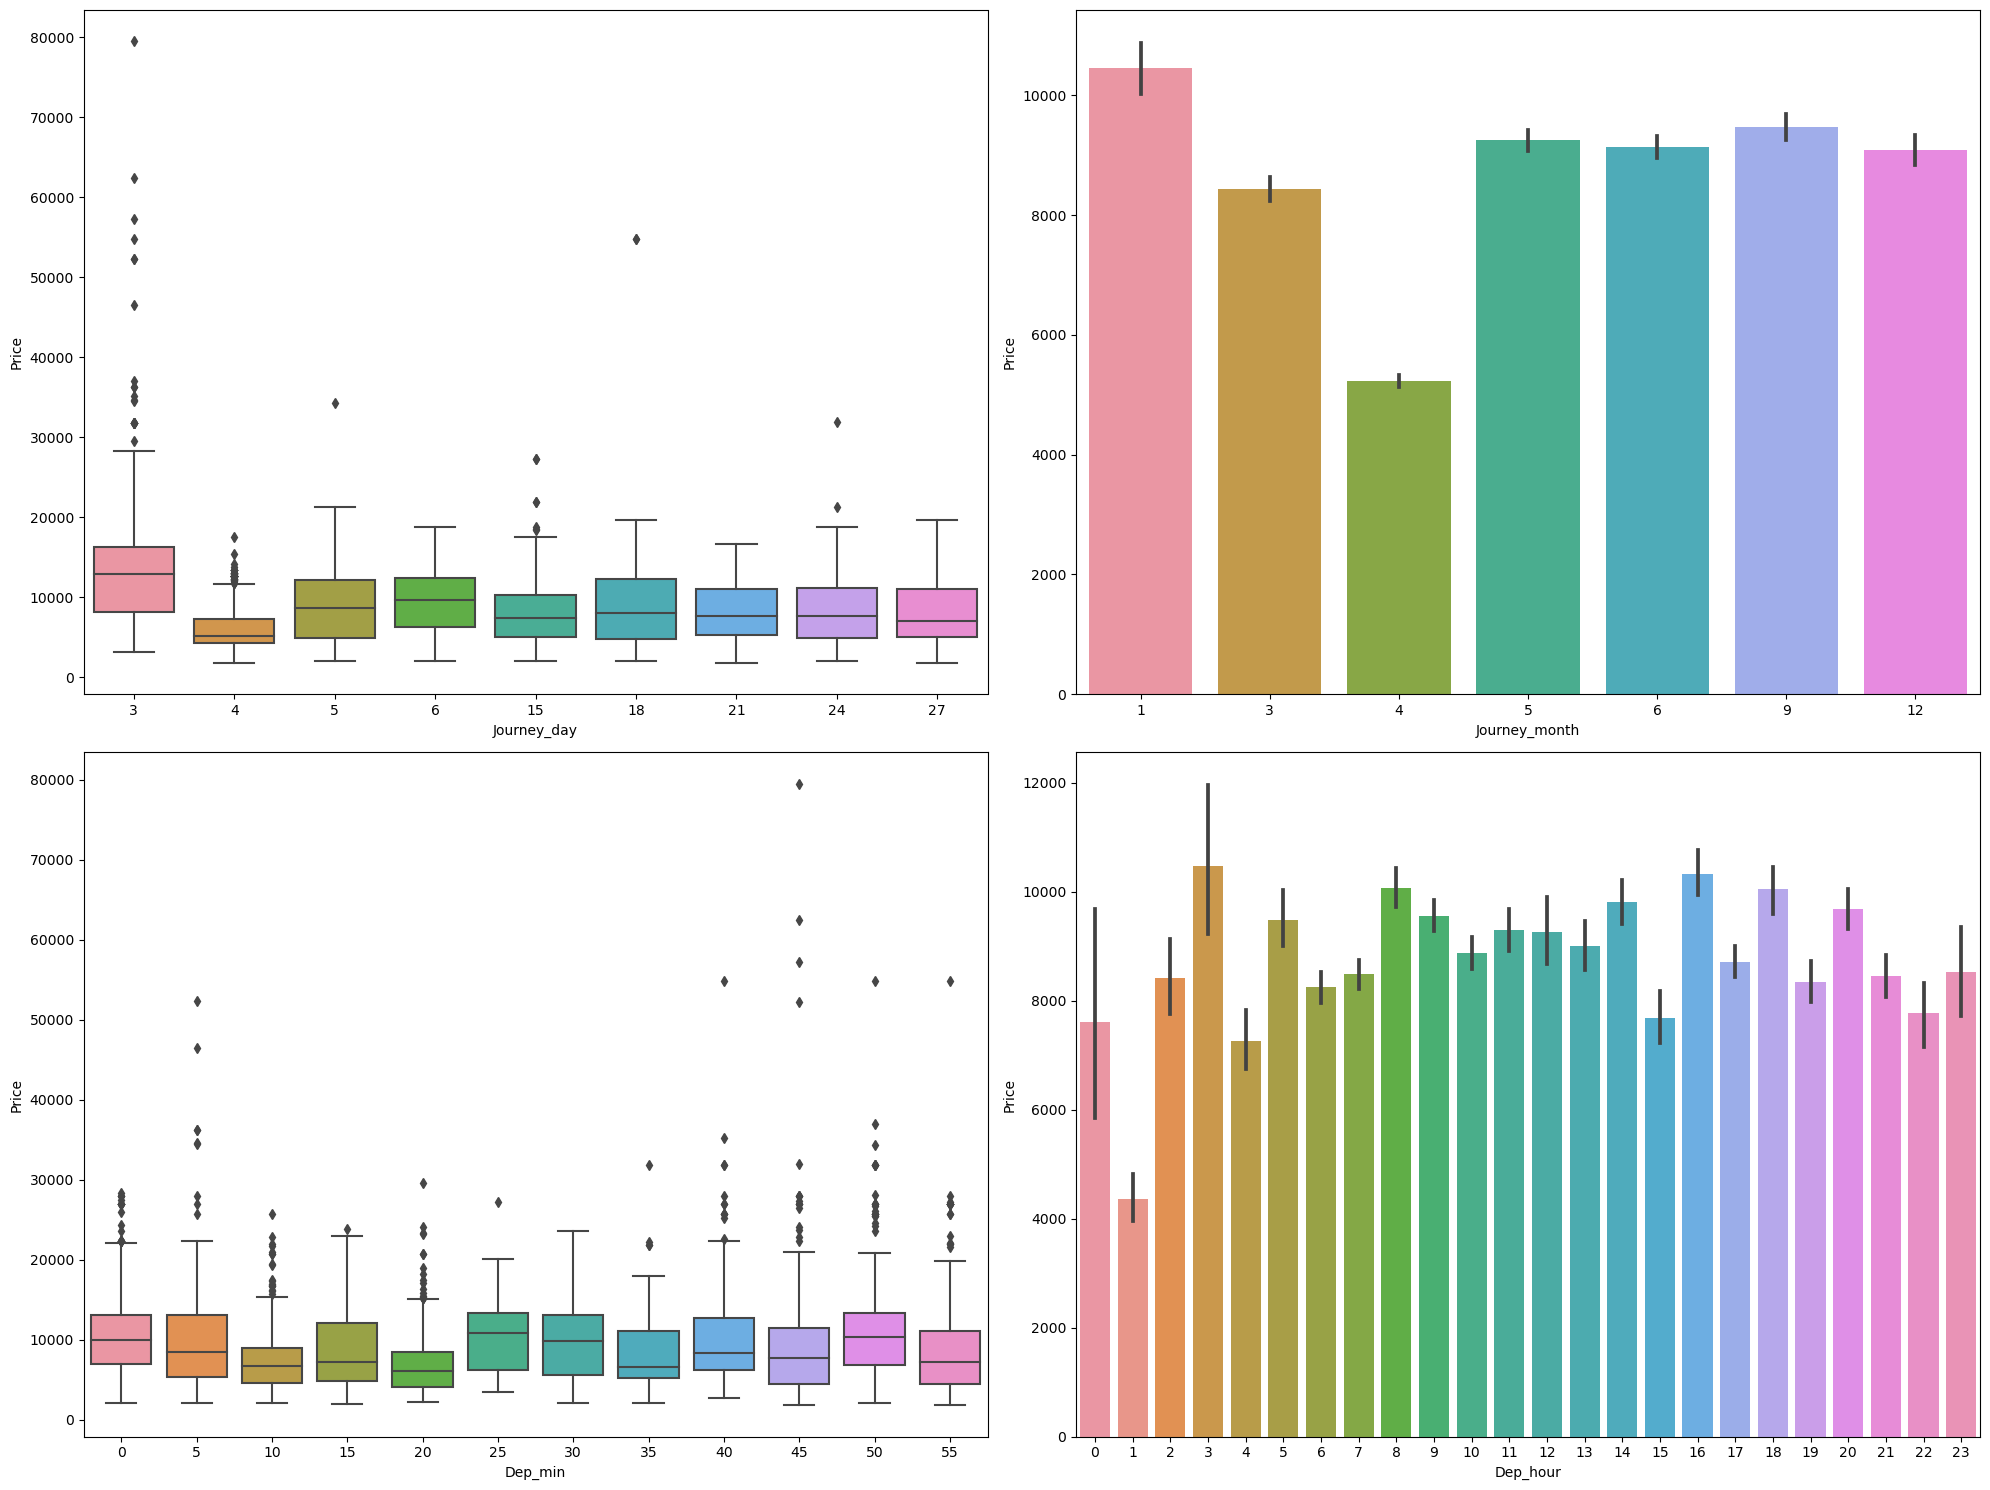

In [127]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.boxplot('Journey_day','Price',data=data,ax=ax[0,0])

sns.barplot('Journey_month','Price',data=data,ax=ax[0,1])

sns.boxplot('Dep_min','Price',data=data,ax=ax[1,0])

sns.barplot('Dep_hour','Price',data=data,ax=ax[1,1])

plt.show()

#### Insights
* Ticket price is high on day 3 followed by day 18.
* Ticket price is high on January month while it's very less on April.

# Converting categorical data into numerical using Label Encoder

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(data[i])

data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,2,18,170,4,7,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,7,7662,5,1,5,50,13,15
2,4,2,1,118,1140,1,7,13882,6,9,9,25,4,25
3,3,3,0,91,325,0,7,6218,5,12,18,5,23,30
4,3,0,2,29,285,0,7,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,7,4107,4,9,19,55,22,25
10679,1,3,0,64,155,4,7,4145,27,4,20,45,23,20
10680,4,0,2,18,180,4,7,7229,27,4,8,20,11,20
10681,10,0,2,18,160,4,7,12648,3,1,11,30,14,10


In [129]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'], int64: ['Duration', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']}

# Data Preprocessing

## Checking the distribution

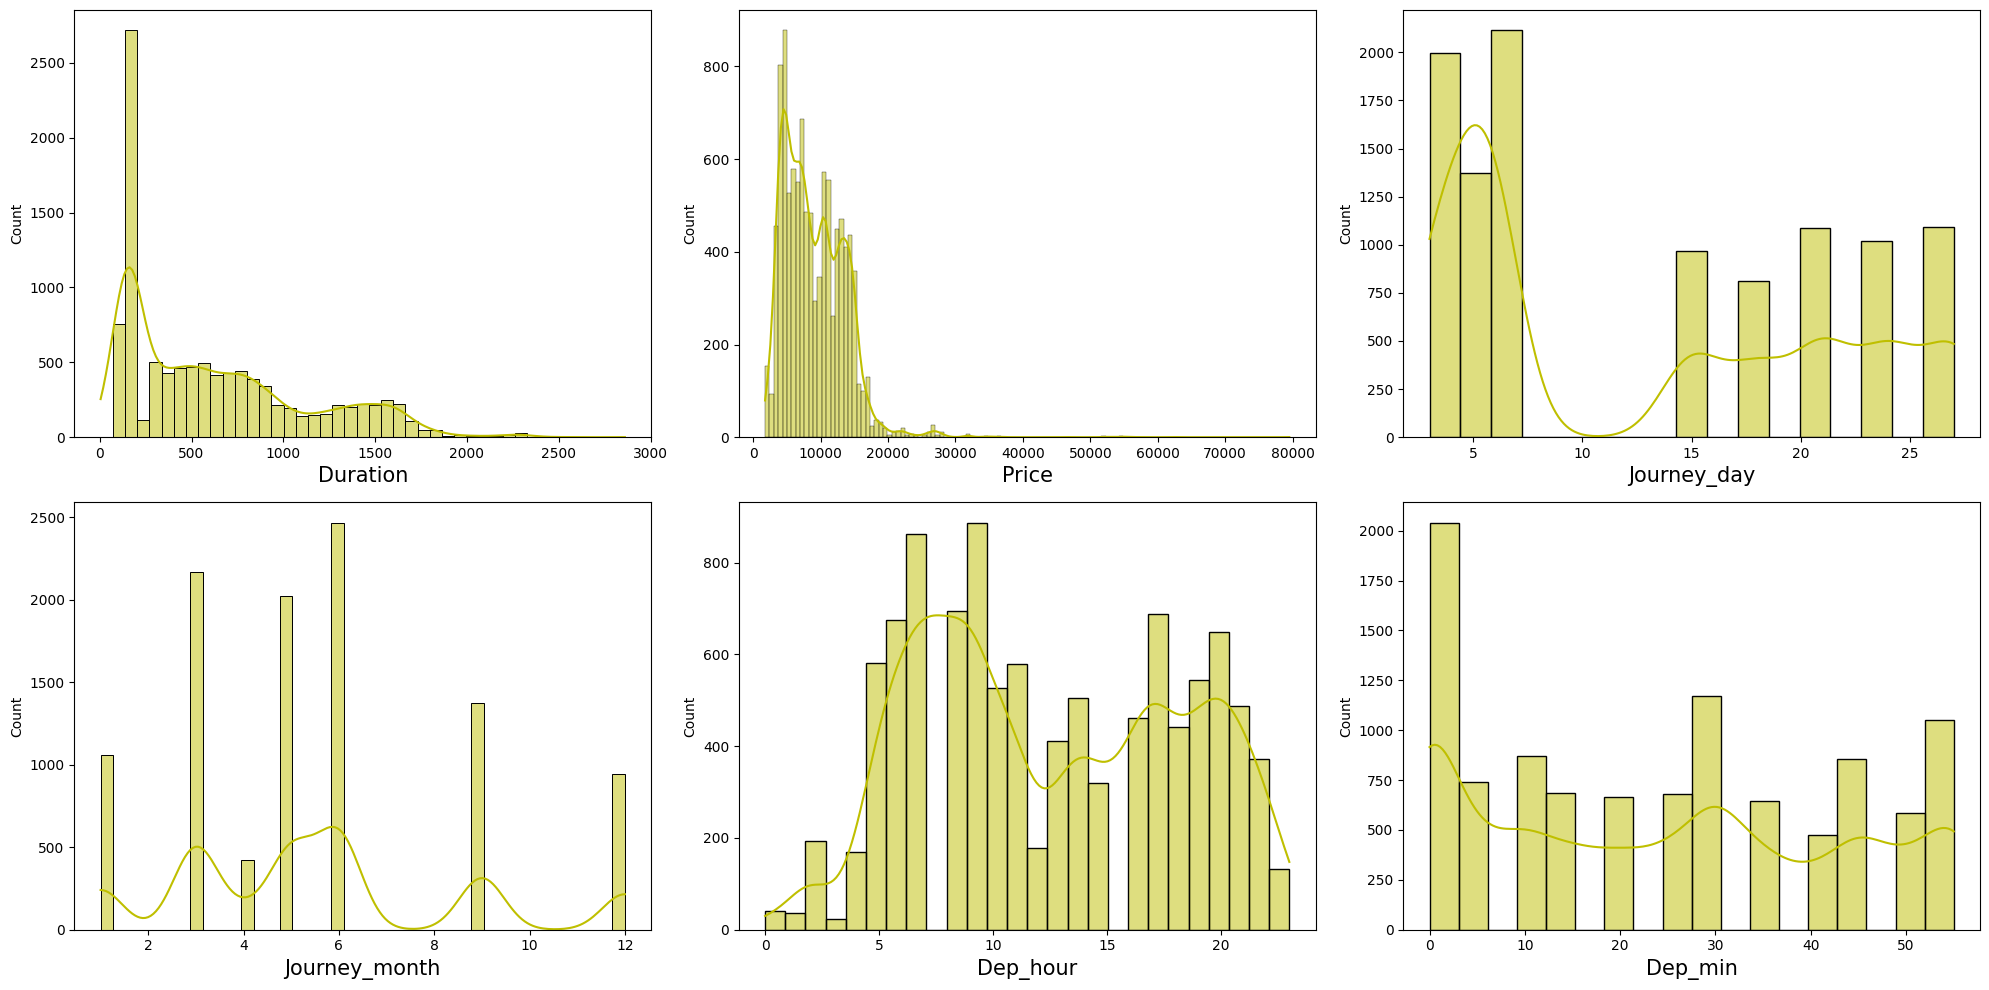

In [171]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(data[column],color='y',kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Insights
* None of the feature follows normal distribution.
* Duration and price have skewed distribution.

## Outliers detection and removal

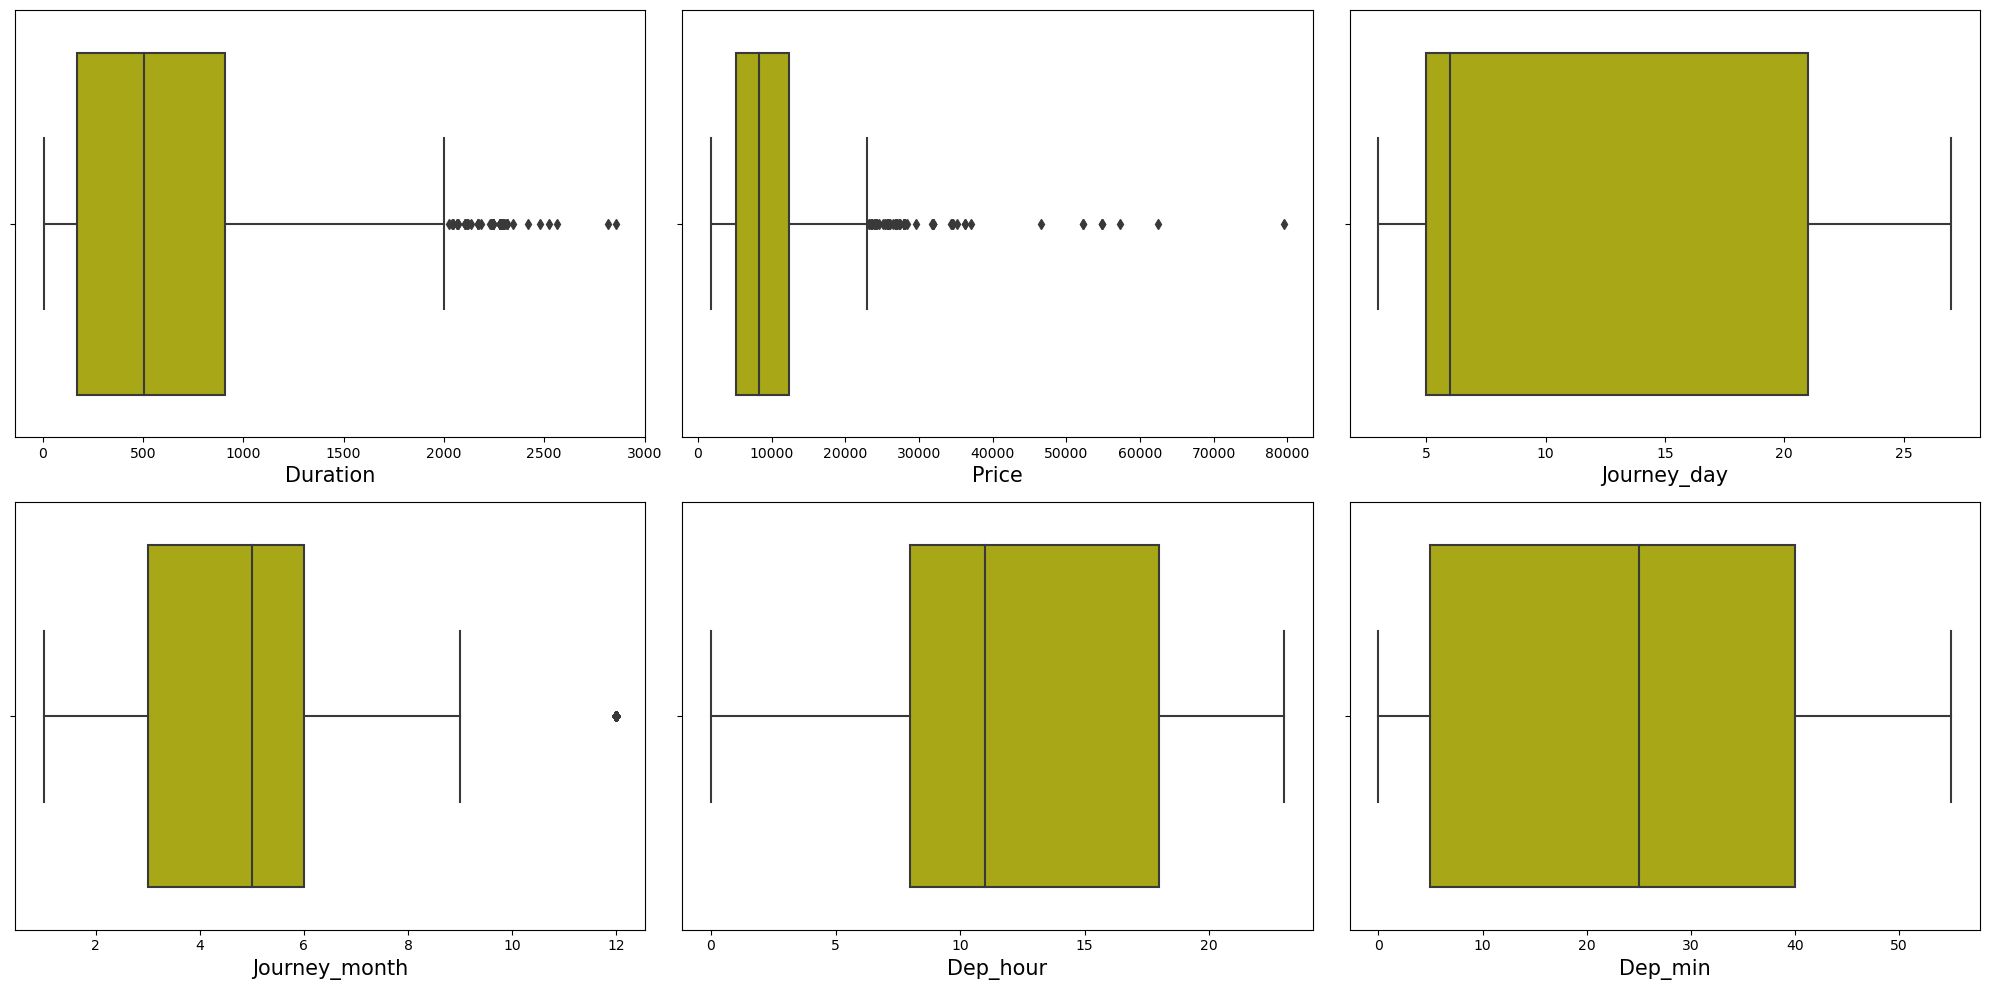

In [130]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color='y')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Insights
* There are outliers in Duration, Journey day and Journey month.

### Imputing outliers in Duration with median

In [131]:
q1 = data.Duration.quantile(.25)
q3 = data.Duration.quantile(.75)
IQR = q3-q1
lower_limit = q1 - (1.5*IQR)
upper_limit = q3 + (1.5*IQR)

In [132]:
data[data.Duration<lower_limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [133]:
data[data.Duration>upper_limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
226,4,2,1,113,2245,1,7,18799,3,3,5,25,18,50
470,4,2,1,126,2045,1,7,13082,21,3,18,20,4,25
553,1,2,1,97,2295,1,7,10598,3,9,5,0,19,15
919,1,3,0,63,2115,2,7,10991,5,12,12,0,23,15
925,4,2,1,107,2135,1,7,19907,3,6,16,50,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,1,2,1,102,2240,1,7,13748,3,3,5,55,19,15
10020,1,2,1,97,2295,1,7,9653,5,9,5,0,19,15
10326,1,0,2,16,2420,1,7,11791,3,3,5,50,22,10
10456,4,2,1,97,2860,1,7,20694,3,6,19,10,18,50


In [134]:
data.Duration.median()

505.0

In [135]:
#imputing outliers with median since it is not normal distribution
data.loc[data.Duration>upper_limit,'Duration']=505.0

### Imputing outliers in Journey_month with median

In [136]:
q1 = data.Journey_month.quantile(.25)
q3 = data.Journey_month.quantile(.75)
IQR = q3-q1
lower_limit1 = q1 - (1.5*IQR)
upper_limit1 = q3 + (1.5*IQR)

In [137]:
data[data.Journey_month>upper_limit1]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
3,3,3,0,91,325,0,7,6218,5,12,18,5,23,30
6,4,0,2,5,930,0,5,11087,3,12,18,55,10,25
8,4,0,2,5,1530,0,5,11087,3,12,8,55,10,25
17,4,2,1,104,1355,0,5,10262,6,12,14,0,12,35
18,1,2,1,105,1380,1,7,13381,6,12,20,15,19,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,8,0,2,18,160,4,6,4319,6,12,5,55,8,35
10666,4,2,1,104,1485,0,5,10262,6,12,18,15,19,0
10667,4,0,2,5,1285,0,5,11087,3,12,22,55,20,20
10670,1,3,0,85,1045,1,7,11411,5,12,5,50,23,15


In [138]:
(data[data.Journey_month>upper_limit1].shape[0]/data.shape[0])*100

9.04311251314406

#### Insights
* The outliers are about 10%. So we do not impute them

# Feature selection and Feature engineering

In [139]:
#correlation
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012048,0.068618,0.029681,-0.138355,0.034396,-0.075468,-0.036549,0.032510,-0.008633,-0.032280,-0.062383,-0.005157,-0.072935
Source,-0.012048,1.000000,-0.432494,0.403587,0.170424,-0.222515,-0.015212,0.013596,0.007863,0.062496,0.060771,-0.056734,0.027701,0.021073
Destination,0.068618,-0.432494,1.000000,-0.229323,-0.397083,0.509205,0.058760,-0.260673,0.007187,-0.069117,-0.089346,0.096899,-0.061327,0.007413
Route,0.029681,0.403587,-0.229323,1.000000,0.268953,-0.435871,0.051149,0.154196,0.094499,0.039771,-0.074781,-0.071013,0.021043,-0.174527
Duration,-0.138355,0.170424,-0.397083,0.268953,1.000000,-0.630513,-0.167518,0.501381,-0.046500,0.063810,0.023712,-0.018430,0.048295,-0.073170
Total_Stops,0.034396,-0.222515,0.509205,-0.435871,-0.630513,1.000000,0.146193,-0.571908,0.045292,-0.055328,0.039929,0.049358,-0.098865,0.177065
Additional_Info,-0.075468,-0.015212,0.058760,0.051149,-0.167518,0.146193,1.000000,-0.067162,-0.018027,-0.000312,-0.056370,-0.022718,0.026803,0.042353
Price,-0.036549,0.013596,-0.260673,0.154196,0.501381,-0.571908,-0.067162,1.000000,-0.171050,0.008553,0.005392,-0.024210,0.030841,-0.086295
Journey_day,0.032510,0.007863,0.007187,0.094499,-0.046500,0.045292,-0.018027,-0.171050,1.000000,-0.265241,-0.007641,-0.013688,-0.001080,-0.019643
Journey_month,-0.008633,0.062496,-0.069117,0.039771,0.063810,-0.055328,-0.000312,0.008553,-0.265241,1.000000,0.028731,0.001878,-0.003345,-0.023791


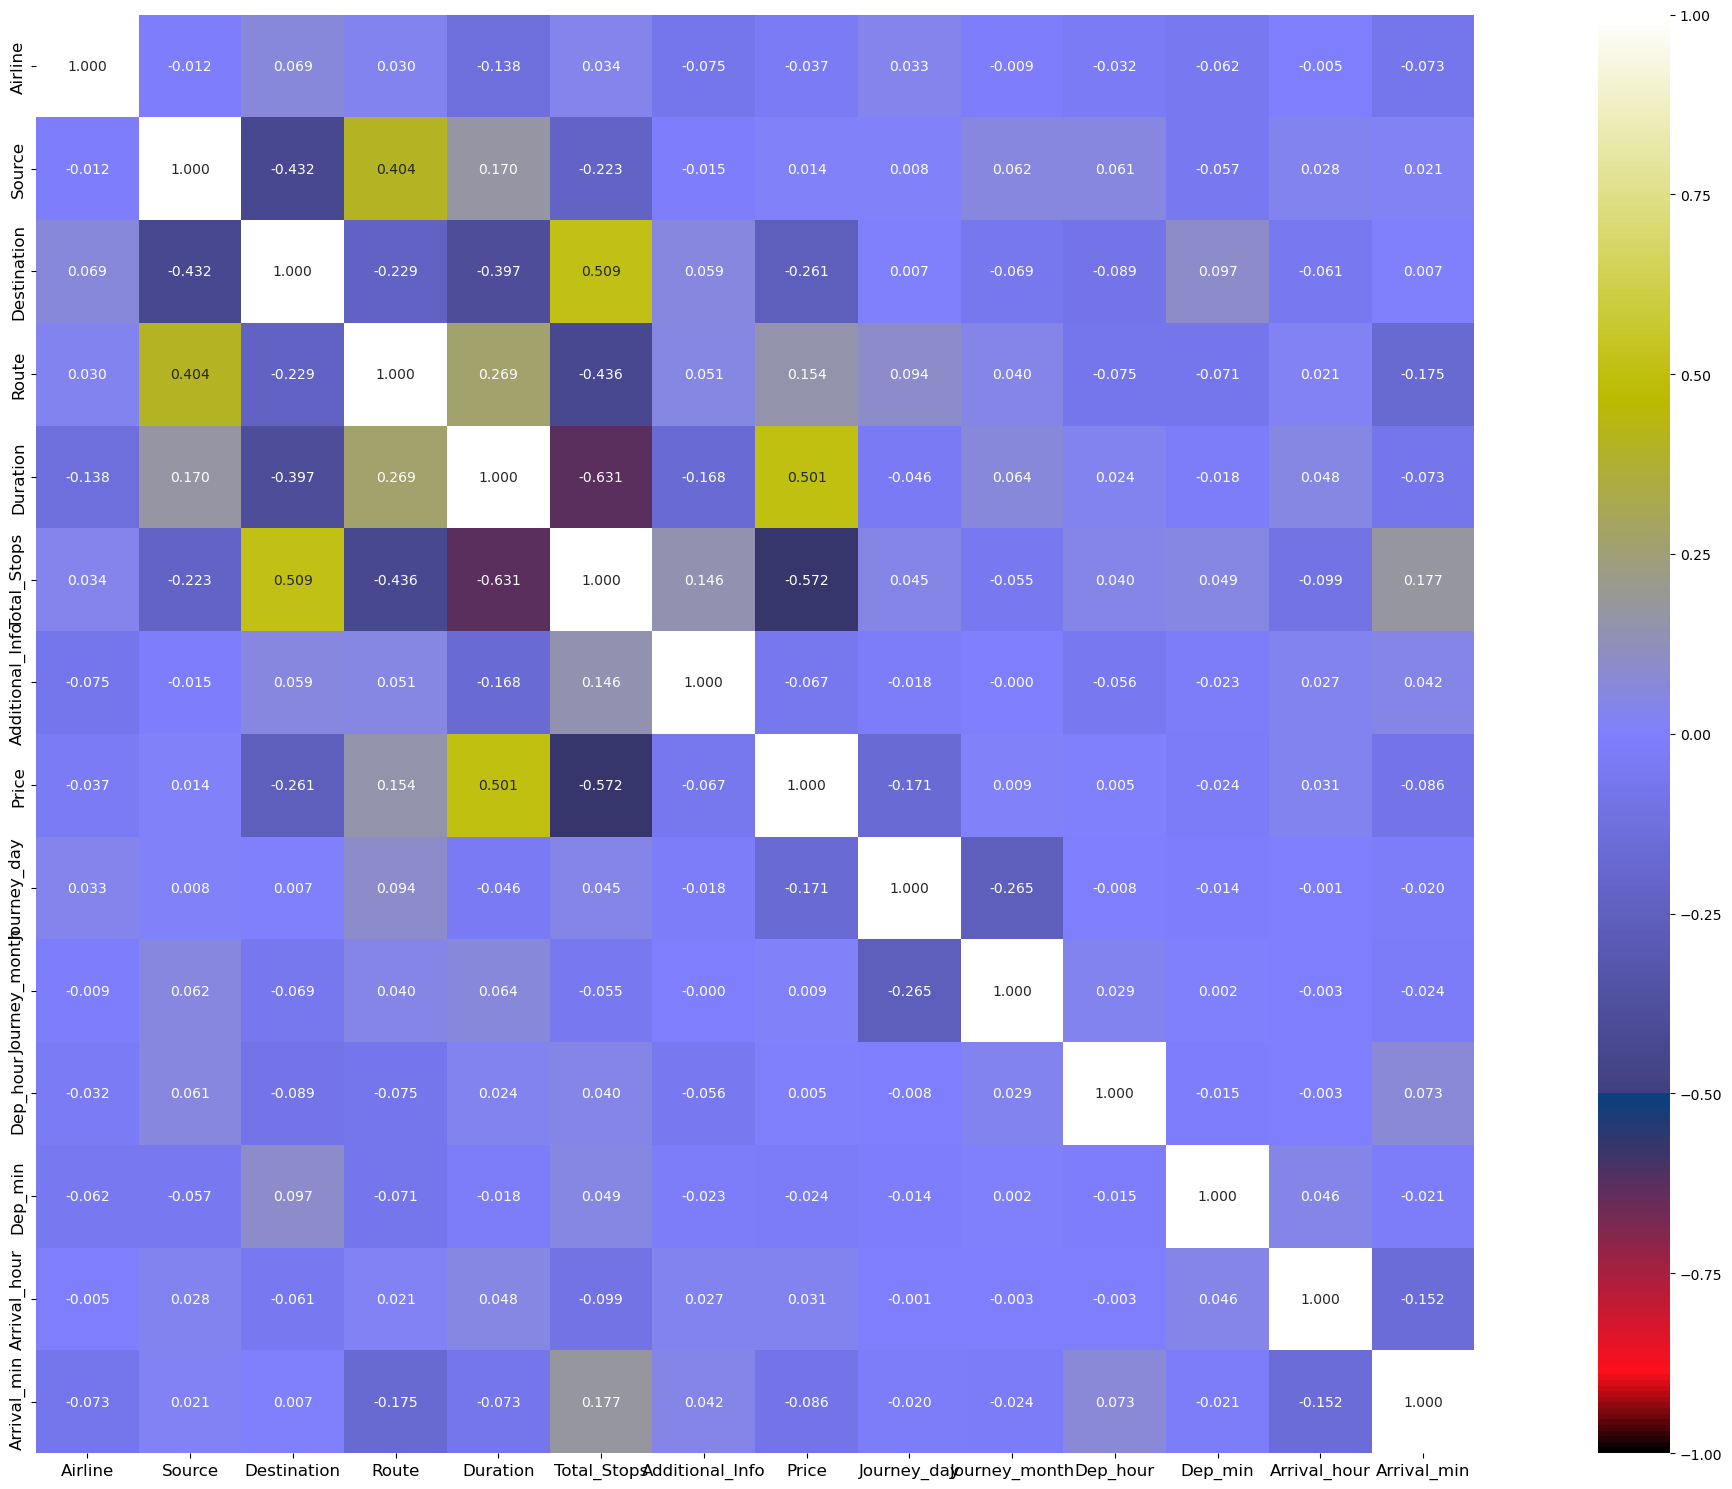

In [140]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Insights
* None of the features are highly correlated. So no need to drop any.

## Splitting the data

In [141]:
#splitting
x =  data.drop('Price',axis=1)
y = data.Price

## Scaling the data using Standard scaler

In [142]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

## Machine learning model building

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from prettytable import PrettyTable

In [144]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=214,test_size=0.25)
print('Training data shape :',x_train.shape)
print('Testing data shape :',x_test.shape)

Training data shape : (7845, 13)
Testing data shape : (2616, 13)


## Linear regression Base Model

In [145]:
lnr = LinearRegression()
lnr_model = lnr.fit(x_train,y_train)
y_pred = lnr_model.predict(x_test)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 12091354.4574692
Mean absolute error : 2548.5928459230927
R2 score : 0.41856527764235874


### Cross Validation

In [146]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lnr_model,x,y,cv=3)
print('Mean CV Score :',score.mean())

Mean CV Score : 0.4020808882215883


## Applying other ML models

In [147]:
from sklearn.ensemble import BaggingRegressor
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
et = ExtraTreesRegressor()
br = BaggingRegressor()
adb = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

models = [rf,et,dt,adb,xgb,gb,br]
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    y_pred_train = m.predict(x_train)
    print('\n')
    print('\033[1m',m,':'+'\033[0m')
    print('\n')
    print('\033[1m'+'Test accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_test,y_pred))
    print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 Score:',r2_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Train Accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_train,y_pred_train))
    print('Mean absolute error :',mean_absolute_error(y_train,y_pred_train))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('R2 Score:',r2_score(y_train,y_pred_train))
    print('=======================================')



 RandomForestRegressor() :


Test accuracy :-
Mean squarred error : 2502423.782302294
Mean absolute error : 672.1769716852338
Root mean squarred error : 1581.9051116619776
R2 Score: 0.879666411054115


Train Accuracy :-
Mean squarred error : 474317.9362749967
Mean absolute error : 274.6314269006646
Root mean squarred error : 688.7074388120087
R2 Score: 0.9780242852046632


 ExtraTreesRegressor() :


Test accuracy :-
Mean squarred error : 2020112.7966114816
Mean absolute error : 647.9427682212029
Root mean squarred error : 1421.3067215106955
R2 Score: 0.9028592100942545


Train Accuracy :-
Mean squarred error : 75777.1429785426
Mean absolute error : 35.2424049288294
Root mean squarred error : 275.27648460873405
R2 Score: 0.9964891547319931


 DecisionTreeRegressor() :


Test accuracy :-
Mean squarred error : 4801721.934866632
Mean absolute error : 788.5245922528032
Root mean squarred error : 2191.283170853697
R2 Score: 0.7691004866445593


Train Accuracy :-
Mean squarred error : 75777

## Cross validation

In [148]:
for m in models:
    score = cross_val_score(m,x,y,cv=5)
    print('\n')
    print('Cross validation score :',m)
    print('Mean CV Score :',score.mean())
    print('\n')
    print('================================')



Cross validation score : RandomForestRegressor()
Mean CV Score : 0.8712588169157728




Cross validation score : ExtraTreesRegressor()
Mean CV Score : 0.8973265164668988




Cross validation score : DecisionTreeRegressor()
Mean CV Score : 0.7993691725477184




Cross validation score : AdaBoostRegressor()
Mean CV Score : 0.31305603615538163




Cross validation score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
      

## Model Comparison

In [149]:
pt = PrettyTable()
pt.field_names = ['Model','Train Accuracy','Test Accuracy','CV Score']
pt.add_row(['RandomForest Regressor','97.91%','87.61%','87.12%'])
pt.add_row(['ExtraTrees Regressor','99.64%','90.41%','89.91%'])
pt.add_row(['DecisionTree Regressor','99.64%','78.52%','78.26%'])
pt.add_row(['AdaBoost Regressor','49.10%','45.14%','24.46%'])
pt.add_row(['XGB Regressor','97.76%','90.67%','89.28%'])
pt.add_row(['GradientBoosting Regressor','83.23%','83.15%','82.11%'])
pt.add_row(['Bagging Regressor','96.88%','85.26%','85.94%'])

print(pt)

+----------------------------+----------------+---------------+----------+
|           Model            | Train Accuracy | Test Accuracy | CV Score |
+----------------------------+----------------+---------------+----------+
|   RandomForest Regressor   |     97.91%     |     87.61%    |  87.12%  |
|    ExtraTrees Regressor    |     99.64%     |     90.41%    |  89.91%  |
|   DecisionTree Regressor   |     99.64%     |     78.52%    |  78.26%  |
|     AdaBoost Regressor     |     49.10%     |     45.14%    |  24.46%  |
|       XGB Regressor        |     97.76%     |     90.67%    |  89.28%  |
| GradientBoosting Regressor |     83.23%     |     83.15%    |  82.11%  |
|     Bagging Regressor      |     96.88%     |     85.26%    |  85.94%  |
+----------------------------+----------------+---------------+----------+


#### Insights
* We are getting r2 score as 90.41 and CV score as 89.91 for ExtraTreesRegressor and as 90.67 and 89.28 for XGBRegressor. So we will do hyper parameter tuning for these model.

## Hyper Parameter Tuning

In [150]:
from sklearn.model_selection import GridSearchCV

#parameters for XGBRegressor
xgb_param = {'n_estimators':[50,60,75,100],
             'gamma':np.arange(0,0.2,0.1),
            'booster':['gbtree','dart','gblinear'],
             'max_depth':[2,4,6,8],
            'eta':[0.001,0.01,0.1]}

#parameters for ExtraTreesregressor
et_param = {'n_estimators': [50,60,75,100,150], 
    'max_features': ['auto', 'sqrt'],     
    'max_depth': np.arange(10, 110, 20),  
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],         
    'bootstrap': [True, False]}


In [151]:
GCV_xgb = GridSearchCV(XGBRegressor(),parameter,verbose=10)

In [86]:
GCV_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.600 total time=   1.0s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.038 total time=   0.0s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.372 total time=   0.0s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.478 total time=   0.0s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 5/5

[CV 1/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.584 total time=   0.1s
[CV 2/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 2/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.016 total time=   0.0s
[CV 3/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 3/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.351 total time=   0.0s
[CV 4/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 4/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.460 total time=   0.0s
[CV 5/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 5/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.503 total time=   0.0s
[CV 1/5; 10/288] START booster=gbtree, 

[CV 5/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.098 total time=   0.2s
[CV 1/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 1/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.600 total time=   0.0s
[CV 2/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 2/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.038 total time=   0.0s
[CV 3/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 3/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.372 total time=   0.0s
[CV 4/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 4/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.478 total time=   0.0s
[CV 5/5; 17/288] START booste

[CV 5/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.107 total time=   0.0s
[CV 1/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.584 total time=   0.0s
[CV 2/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.016 total time=   0.0s
[CV 3/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.351 total time=   0.0s
[CV 4/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.460 total time=   0.0s
[CV 5/5; 25/288] START booste

[CV 4/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-3.059 total time=   0.1s
[CV 5/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-3.098 total time=   0.2s
[CV 1/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50;, score=-1.142 total time=   0.0s
[CV 2/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50
[CV 2/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50;, score=-0.998 total time=   0.0s
[CV 3/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50
[CV 3/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50;, score=-1.087 total time=   0.0s
[CV 4/5; 33/288] START booster=gb

[CV 3/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.070 total time=   0.0s
[CV 4/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 4/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.077 total time=   0.0s
[CV 5/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.060 total time=   0.0s
[CV 1/5; 41/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50
[CV 1/5; 41/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50;, score=-1.017 total time=   0.0s
[CV 2/5; 41/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50
[CV 2/5; 41/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50;, score=-0.833 total time=   0.0s
[CV 3/5; 41/288] START booster=gbtree

[CV 2/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.169 total time=   0.1s
[CV 3/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.160 total time=   0.1s
[CV 4/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.173 total time=   0.1s
[CV 5/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 5/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.135 total time=   0.1s
[CV 1/5; 49/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=50
[CV 1/5; 49/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=50;, score=-1.142 total time=   0.0s
[CV 2/5; 49/288] START booster=gbtre

[CV 3/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.070 total time=   0.0s
[CV 4/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.077 total time=   0.0s
[CV 5/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.060 total time=   0.0s
[CV 1/5; 57/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 57/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.017 total time=   0.0s
[CV 2/5; 57/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 57/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-0.833 total time=   0.0s
[CV 3/5; 57/288] START booster=gbtree

[CV 2/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.169 total time=   0.1s
[CV 3/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 3/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.160 total time=   0.1s
[CV 4/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 4/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.173 total time=   0.1s
[CV 5/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.135 total time=   0.1s
[CV 1/5; 65/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 65/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=50;, score=0.671 total time=   0.0s
[CV 2/5; 65/288] START booster=gbtree, 

[CV 4/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.825 total time=   0.0s
[CV 1/5; 73/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[CV 1/5; 73/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 73/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[CV 2/5; 73/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.859 total time=   0.0s
[CV 3/5; 73/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[CV 3/5; 73/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.843 total time=   0.0s
[CV 4/5; 73/288] START booster=gbtree, eta=0.1, ga

[CV 4/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.894 total time=   0.1s
[CV 5/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 5/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.884 total time=   0.1s
[CV 1/5; 81/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50
[CV 1/5; 81/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.671 total time=   0.0s
[CV 2/5; 81/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50
[CV 2/5; 81/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.699 total time=   0.0s
[CV 3/5; 81/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50
[CV 3/5; 81/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.720 total time=   0.0s
[CV 4/5; 81/288] START booster=gbtree, eta=0.1, ga

[CV 4/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.825 total time=   0.0s
[CV 1/5; 89/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 89/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 89/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 89/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.859 total time=   0.0s
[CV 3/5; 89/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 89/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.843 total time=   0.0s
[CV 4/5; 89/288] START booster=gbtree, eta=0.1, ga

[CV 4/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.894 total time=   0.2s
[CV 5/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.884 total time=   0.1s
[CV 1/5; 97/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 97/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.600 total time=   0.1s
[CV 2/5; 97/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 2/5; 97/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.038 total time=   0.1s
[CV 3/5; 97/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 3/5; 97/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=-3.372 total time=   0.1s
[CV 4/5; 97/288] START booster=dart, eta=0.001,

[CV 4/5; 104/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100;, score=-3.069 total time=   0.6s
[CV 5/5; 104/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 104/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100;, score=-3.107 total time=   0.7s
[CV 1/5; 105/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 1/5; 105/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.584 total time=   0.2s
[CV 2/5; 105/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 2/5; 105/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.016 total time=   0.2s
[CV 3/5; 105/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[CV 3/5; 105/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-3.351 total time=   0.2s
[CV 4/5; 105/288] START booster=dart

[CV 3/5; 112/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-2.962 total time=   0.8s
[CV 4/5; 112/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 112/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.059 total time=   0.9s
[CV 5/5; 112/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 5/5; 112/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.098 total time=   0.8s
[CV 1/5; 113/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 1/5; 113/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.600 total time=   0.1s
[CV 2/5; 113/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50
[CV 2/5; 113/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=50;, score=-3.038 total time=   0.1s
[CV 3/5; 113/288] START booster=da

[CV 2/5; 120/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-2.683 total time=   0.6s
[CV 3/5; 120/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 3/5; 120/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-2.973 total time=   0.6s
[CV 4/5; 120/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 120/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.069 total time=   0.7s
[CV 5/5; 120/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 120/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.107 total time=   0.6s
[CV 1/5; 121/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 121/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.584 total time=   0.1s
[CV 2/5; 121/288] START booster=

[CV 1/5; 128/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-3.173 total time=   0.8s
[CV 2/5; 128/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[CV 2/5; 128/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-2.665 total time=   0.9s
[CV 3/5; 128/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[CV 3/5; 128/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-2.962 total time=   0.9s
[CV 4/5; 128/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[CV 4/5; 128/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-3.059 total time=   0.8s
[CV 5/5; 128/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 128/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-3.098 total time=   0.8s
[CV 1/5; 129/288] START booste

[CV 1/5; 136/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.027 total time=   0.7s
[CV 2/5; 136/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 2/5; 136/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.065 total time=   0.7s
[CV 3/5; 136/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 3/5; 136/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.070 total time=   0.7s
[CV 4/5; 136/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 4/5; 136/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.077 total time=   0.7s
[CV 5/5; 136/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 136/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.060 total time=   0.7s
[CV 1/5; 137/288] START booster=dart, eta=0.

[CV 1/5; 144/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.121 total time=   0.9s
[CV 2/5; 144/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 144/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.169 total time=   0.9s
[CV 3/5; 144/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 144/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.160 total time=   0.9s
[CV 4/5; 144/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 144/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.173 total time=   0.9s
[CV 5/5; 144/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 5/5; 144/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.135 total time=   1.1s
[CV 1/5; 145/288] START booster=dart, eta=0.

[CV 1/5; 152/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.027 total time=   0.7s
[CV 2/5; 152/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 2/5; 152/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.065 total time=   0.7s
[CV 3/5; 152/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 3/5; 152/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.070 total time=   0.8s
[CV 4/5; 152/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 152/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.077 total time=   0.9s
[CV 5/5; 152/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 152/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=0.060 total time=   0.9s
[CV 1/5; 153/288] START booster=dart, eta=0.

[CV 1/5; 160/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.121 total time=   1.2s
[CV 2/5; 160/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 2/5; 160/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.169 total time=   1.6s
[CV 3/5; 160/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 3/5; 160/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.160 total time=   1.6s
[CV 4/5; 160/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 4/5; 160/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.173 total time=   1.5s
[CV 5/5; 160/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 160/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.135 total time=   2.3s
[CV 1/5; 161/288] START booster=dart, eta=0.

[CV 1/5; 168/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.778 total time=   0.7s
[CV 2/5; 168/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 2/5; 168/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.855 total time=   0.7s
[CV 3/5; 168/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 3/5; 168/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.840 total time=   0.8s
[CV 4/5; 168/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 4/5; 168/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.860 total time=   0.8s
[CV 5/5; 168/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 168/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.825 total time=   0.8s
[CV 1/5; 169/288] START booster=dart, eta=0.1, gamma=

[CV 1/5; 176/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.848 total time=   1.0s
[CV 2/5; 176/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 176/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.874 total time=   0.9s
[CV 3/5; 176/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 176/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.881 total time=   1.2s
[CV 4/5; 176/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 176/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.894 total time=   1.0s
[CV 5/5; 176/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 5/5; 176/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.884 total time=   1.0s
[CV 1/5; 177/288] START booster=dart, eta=0.1, gamma=

[CV 1/5; 184/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.778 total time=   0.7s
[CV 2/5; 184/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 2/5; 184/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.855 total time=   0.7s
[CV 3/5; 184/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 3/5; 184/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.840 total time=   0.8s
[CV 4/5; 184/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 184/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.860 total time=   0.7s
[CV 5/5; 184/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 184/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.825 total time=   0.8s
[CV 1/5; 185/288] START booster=dart, eta=0.1, gamma=

[CV 1/5; 192/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.848 total time=   0.9s
[CV 2/5; 192/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 2/5; 192/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.874 total time=   1.0s
[CV 3/5; 192/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 3/5; 192/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.881 total time=   1.0s
[CV 4/5; 192/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 4/5; 192/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.894 total time=   0.9s
[CV 5/5; 192/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 5/5; 192/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.884 total time=   0.9s
[CV 1/5; 193/288] START booster=gblinear, eta=0.001, 

[CV 2/5; 197/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-3.026 total time=   0.0s
[CV 3/5; 197/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[22:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 197/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-3.356 total time=   0.0s
[CV 4/5; 197/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[22:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 197/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-3.464 total time=   0.0s
[CV 5/5; 197/288] START

[CV 4/5; 202/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=60;, score=-3.382 total time=   0.0s
[CV 5/5; 202/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=60
[22:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 202/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=60;, score=-3.412 total time=   0.0s
[CV 1/5; 203/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75
[22:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 203/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-3.374 total time=   0.0s
[CV 2/5; 203/288] START

[CV 4/5; 207/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-3.264 total time=   0.0s
[CV 5/5; 207/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[22:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 207/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-3.289 total time=   0.0s
[CV 1/5; 208/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[22:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 208/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-3.178 total time=   0.0s
[CV 2/5; 208/288] STA

[CV 2/5; 212/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100;, score=-2.696 total time=   0.0s
[CV 3/5; 212/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100
[22:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 212/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100;, score=-2.983 total time=   0.0s
[CV 4/5; 212/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100
[22:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 212/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100;, score=-3.075 total time=   0.0s
[CV 5/5; 212/288] 

[CV 4/5; 216/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.075 total time=   0.0s
[CV 5/5; 216/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[22:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 216/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.093 total time=   0.0s
[CV 1/5; 217/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[22:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 217/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-3.581 total time=   0.0s
[CV 2/5; 217/288] ST

[CV 1/5; 221/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=50;, score=-3.581 total time=   0.0s
[CV 2/5; 221/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=50
[22:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 221/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=50;, score=-3.026 total time=   0.0s
[CV 3/5; 221/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=50
[22:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 221/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=50;, score=-3.356 total time=   0.0s
[CV 4/5; 221/288] START

[22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 225/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=50;, score=-1.081 total time=   0.0s
[CV 1/5; 226/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=60
[22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 226/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=60;, score=-0.857 total time=   0.0s
[CV 2/5; 226/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=60
[22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:76

[CV 3/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=60;, score=-0.829 total time=   0.0s
[CV 4/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=60
[22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=60;, score=-0.835 total time=   0.0s
[CV 5/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=60
[22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=60;, score=-0.798 total time=   0.0s
[CV 1/5; 231/288] START boos

[CV 3/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.515 total time=   0.0s
[CV 4/5; 235/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[22:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.511 total time=   0.0s
[CV 5/5; 235/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[22:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.472 total time=   0.0s
[CV 1/5; 236/288] START boos

[CV 1/5; 240/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-0.147 total time=   0.0s
[CV 2/5; 240/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[22:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 240/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-0.178 total time=   0.0s
[CV 3/5; 240/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[22:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 240/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-0.163 total time=   0.0s
[CV 4/5; 240/288] START

[CV 5/5; 244/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=2, n_estimators=100;, score=-0.112 total time=   0.0s
[CV 1/5; 245/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=50
[22:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 245/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=50;, score=-1.146 total time=   0.0s
[CV 2/5; 245/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=50
[22:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 245/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=50;, score=-1.020 total time=   0.0s
[CV 3/5; 245/288] START boo

[22:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 249/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.081 total time=   0.0s
[CV 1/5; 250/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60
[22:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 250/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60;, score=-0.857 total time=   0.0s
[CV 2/5; 250/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60
[22:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:76

[CV 4/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=60;, score=-0.835 total time=   0.0s
[CV 5/5; 254/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=60
[22:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=60;, score=-0.798 total time=   0.0s
[CV 1/5; 255/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[22:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.521 total time=   0.0s
[CV 2/5; 255/288] START boos

[CV 3/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.411 total time=   0.0s
[CV 4/5; 259/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[22:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.393 total time=   0.0s
[CV 5/5; 259/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[22:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.393 total time=   0.0s
[CV 1/5; 260/288] START booster=gbli

[22:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 264/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.412 total time=   0.0s
[CV 4/5; 264/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[22:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 264/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.392 total time=   0.0s
[CV 5/5; 264/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[22:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767:

[CV 1/5; 269/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.428 total time=   0.0s
[CV 2/5; 269/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[22:57:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 269/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.357 total time=   0.0s
[CV 3/5; 269/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[22:57:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 269/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.408 total time=   0.0s
[CV 4/5; 269/288] START booster=gbli

[CV 2/5; 273/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.357 total time=   0.0s
[CV 3/5; 273/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50
[22:57:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 273/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.408 total time=   0.0s
[CV 4/5; 273/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50
[22:57:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 273/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=50;, score=0.394 total time=   0.0s
[CV 5/5; 273/288] START booster=gbli

[CV 2/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=60;, score=0.359 total time=   0.0s
[CV 3/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=60
[22:57:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=60;, score=0.410 total time=   0.0s
[CV 4/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=60
[22:57:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=60;, score=0.393 total time=   0.0s
[CV 5/5; 278/288] START booster=gbli

[CV 1/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.428 total time=   0.0s
[CV 2/5; 283/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[22:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.360 total time=   0.0s
[CV 3/5; 283/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[22:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.411 total time=   0.0s
[CV 4/5; 283/288] START booster=gbli

[CV 5/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.393 total time=   0.0s
[CV 1/5; 288/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[22:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 288/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.427 total time=   0.0s
[CV 2/5; 288/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[22:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 288/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.361 total time=   0.0s
[CV 3/5; 288/288] START booster=

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [87]:
GCV_xgb.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

In [152]:
GCV_et = GridSearchCV(ExtraTreesRegressor(),param_grid,verbose=10)

In [58]:
GCV_et.fit(x_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.794 total time=   0.1s
[CV 2/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.2s
[CV 3/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.1s
[CV 4/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_

[CV 4/5; 6/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.860 total time=   0.1s
[CV 5/5; 6/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 6/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.824 total time=   0.1s
[CV 1/5; 7/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 7/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.785 total time=   0.2s
[CV 2/5; 7/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 7/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.837

[CV 3/5; 12/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.837 total time=   0.2s
[CV 4/5; 12/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 12/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.852 total time=   0.2s
[CV 5/5; 12/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 12/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.800 total time=   0.2s
[CV 1/5; 13/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 1/5; 13/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75

[CV 2/5; 18/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.822 total time=   0.2s
[CV 3/5; 18/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 3/5; 18/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.843 total time=   0.2s
[CV 4/5; 18/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 4/5; 18/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.844 total time=   0.2s
[CV 5/5; 18/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 5/5; 18/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, scor

[CV 1/5; 24/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.785 total time=   0.3s
[CV 2/5; 24/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 24/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.819 total time=   0.3s
[CV 3/5; 24/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 24/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.846 total time=   0.3s
[CV 4/5; 24/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 24/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100

[CV 5/5; 29/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.802 total time=   0.3s
[CV 1/5; 30/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 30/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.799 total time=   0.5s
[CV 2/5; 30/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 30/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.804 total time=   0.5s
[CV 3/5; 30/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 30/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimat

[CV 4/5; 35/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.829 total time=   0.6s
[CV 5/5; 35/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 5/5; 35/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.796 total time=   0.6s
[CV 1/5; 36/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 36/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.1s
[CV 2/5; 36/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 36/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, s

[CV 3/5; 41/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.825 total time=   0.1s
[CV 4/5; 41/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 41/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.826 total time=   0.1s
[CV 5/5; 41/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 41/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.788 total time=   0.1s
[CV 1/5; 42/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 42/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60

[CV 3/5; 47/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.750 total time=   0.0s
[CV 4/5; 47/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 47/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.746 total time=   0.1s
[CV 5/5; 47/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 47/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.708 total time=   0.0s
[CV 1/5; 48/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 48/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, scor

[CV 2/5; 53/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.712 total time=   0.1s
[CV 3/5; 53/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 3/5; 53/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.733 total time=   0.1s
[CV 4/5; 53/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 4/5; 53/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.730 total time=   0.1s
[CV 5/5; 53/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 5/5; 53/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, scor

[CV 1/5; 59/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.702 total time=   0.1s
[CV 2/5; 59/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 59/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.678 total time=   0.1s
[CV 3/5; 59/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 59/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.724 total time=   0.1s
[CV 4/5; 59/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 59/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimat

[CV 5/5; 64/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.703 total time=   0.1s
[CV 1/5; 65/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 65/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.699 total time=   0.2s
[CV 2/5; 65/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 65/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.683 total time=   0.2s
[CV 3/5; 65/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 65/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150

[CV 4/5; 70/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.720 total time=   0.2s
[CV 5/5; 70/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 70/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.692 total time=   0.2s
[CV 1/5; 71/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 71/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.691 total time=   0.0s
[CV 2/5; 71/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 71/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50

[CV 5/5; 76/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.677 total time=   0.0s
[CV 1/5; 77/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 77/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.685 total time=   0.0s
[CV 2/5; 77/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 2/5; 77/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.628 total time=   0.0s
[CV 3/5; 77/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 3/5; 77/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, scor

[CV 5/5; 82/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.679 total time=   0.0s
[CV 1/5; 83/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 1/5; 83/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.688 total time=   0.1s
[CV 2/5; 83/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 2/5; 83/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.642 total time=   0.1s
[CV 3/5; 83/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 3/5; 83/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, scor

[CV 4/5; 88/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.709 total time=   0.1s
[CV 5/5; 88/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 5/5; 88/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.661 total time=   0.1s
[CV 1/5; 89/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 89/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.693 total time=   0.1s
[CV 2/5; 89/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 89/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators

[CV 3/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.895 total time=   0.7s
[CV 4/5; 94/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.901 total time=   0.7s
[CV 5/5; 94/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.866 total time=   0.7s
[CV 1/5; 95/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 95/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150

[CV 2/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.870 total time=   0.9s
[CV 3/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.890 total time=   0.9s
[CV 4/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.899 total time=   0.9s
[CV 5/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 5/5; 105/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.844 total time=   0.8s
[CV 1/5; 106/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 106/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 2/5; 106/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 106/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.2s
[CV 3/5; 106/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 106/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV 4/5; 111/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.883 total time=   0.2s
[CV 5/5; 111/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 111/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.846 total time=   0.2s
[CV 1/5; 112/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 112/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.844 total time=   0.3s
[CV 2/5; 112/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 112/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60

[CV 3/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.869 total time=   0.2s
[CV 4/5; 117/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.875 total time=   0.2s
[CV 5/5; 117/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.835 total time=   0.2s
[CV 1/5; 118/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 118/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 1/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.844 total time=   0.4s
[CV 2/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.821 total time=   0.3s
[CV 3/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.857 total time=   0.3s
[CV 4/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 5/5; 128/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.827 total time=   0.3s
[CV 1/5; 129/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 129/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.5s
[CV 2/5; 129/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 129/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.822 total time=   0.5s
[CV 3/5; 129/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 129/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimato

[CV 3/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.855 total time=   0.4s
[CV 4/5; 134/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.859 total time=   0.4s
[CV 5/5; 134/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.825 total time=   0.4s
[CV 1/5; 135/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 135/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_

[CV 2/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.841 total time=   0.6s
[CV 3/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.863 total time=   0.6s
[CV 4/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.866 total time=   2.2s
[CV 5/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV 2/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.786 total time=   0.1s
[CV 3/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.828 total time=   0.0s
[CV 4/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.831 total time=   0.1s
[CV 5/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 1/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.791 total time=   0.1s
[CV 2/5; 152/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.772 total time=   0.1s
[CV 3/5; 152/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 3/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.819 total time=   0.1s
[CV 4/5; 152/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60

[CV 5/5; 157/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.793 total time=   0.1s
[CV 1/5; 158/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 1/5; 158/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.794 total time=   0.1s
[CV 2/5; 158/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 2/5; 158/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.776 total time=   0.1s
[CV 3/5; 158/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 3/5; 158/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75

[CV 3/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.810 total time=   0.1s
[CV 4/5; 163/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 4/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.810 total time=   0.1s
[CV 5/5; 163/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 5/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.775 total time=   0.1s
[CV 1/5; 164/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 164/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estim

[CV 1/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.767 total time=   0.3s
[CV 2/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.711 total time=   0.3s
[CV 3/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.768 total time=   0.2s
[CV 4/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 5/5; 174/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.2s
[CV 1/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.763 total time=   0.3s
[CV 2/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.717 total time=   0.4s
[CV 3/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 3/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.769 total time=   0.3s
[CV 4/5; 180/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.776 total time=   0.3s
[CV 5/5; 180/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 5/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.735 total time=   0.3s
[CV 1/5; 181/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 181/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV 2/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.871 total time=   0.2s
[CV 3/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.882 total time=   0.2s
[CV 4/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.890 total time=   0.2s
[CV 5/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50

[CV 1/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.832 total time=   0.2s
[CV 2/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.855 total time=   0.2s
[CV 3/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.879 total time=   0.2s
[CV 4/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 4/5; 197/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.880 total time=   0.3s
[CV 5/5; 197/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 197/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.867 total time=   0.3s
[CV 1/5; 198/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 1/5; 198/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.847 total time=   0.4s
[CV 2/5; 198/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 2/5; 198/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75

[CV 3/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.881 total time=   0.4s
[CV 4/5; 203/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 4/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.881 total time=   0.4s
[CV 5/5; 203/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 5/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.851 total time=   0.4s
[CV 1/5; 204/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 204/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1

[CV 1/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.842 total time=   0.5s
[CV 2/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.840 total time=   0.5s
[CV 3/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.869 total time=   0.4s
[CV 4/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_

[CV 4/5; 214/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.862 total time=   0.4s
[CV 5/5; 214/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 214/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.826 total time=   0.4s
[CV 1/5; 215/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 1/5; 215/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.843 total time=   0.7s
[CV 2/5; 215/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 2/5; 215/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 3/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.856 total time=   0.7s
[CV 4/5; 220/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.861 total time=   0.7s
[CV 5/5; 220/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.831 total time=   0.7s
[CV 1/5; 221/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 221/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 1/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.1s
[CV 2/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.1s
[CV 3/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.1s
[CV 4/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV 1/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.818 total time=   0.1s
[CV 2/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.812 total time=   0.1s
[CV 3/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.846 total time=   0.1s
[CV 4/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60

[CV 5/5; 237/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.785 total time=   0.1s
[CV 1/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 1/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.804 total time=   0.1s
[CV 2/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 2/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.783 total time=   0.1s
[CV 3/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 3/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 3/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.819 total time=   0.1s
[CV 4/5; 243/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 4/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.827 total time=   0.1s
[CV 5/5; 243/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 5/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.790 total time=   0.1s
[CV 1/5; 244/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 244/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV 2/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.777 total time=   0.2s
[CV 3/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.817 total time=   0.2s
[CV 4/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.828 total time=   0.2s
[CV 5/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV 5/5; 254/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.783 total time=   0.4s
[CV 2/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.753 total time=   0.4s
[CV 3/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_

[CV 4/5; 260/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.782 total time=   0.3s
[CV 5/5; 260/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 5/5; 260/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.743 total time=   0.3s
[CV 1/5; 261/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 261/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.759 total time=   0.0s
[CV 2/5; 261/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 261/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 4/5; 266/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.774 total time=   0.0s
[CV 5/5; 266/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 266/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.734 total time=   0.0s
[CV 1/5; 267/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 267/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.763 total time=   0.0s
[CV 2/5; 267/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 2/5; 267/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 2/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.875 total time=   0.5s
[CV 3/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.886 total time=   0.4s
[CV 4/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.905 total time=   0.4s
[CV 5/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60

[CV 1/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.834 total time=   0.4s
[CV 2/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 2/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.876 total time=   0.4s
[CV 3/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 3/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.897 total time=   0.4s
[CV 4/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 4/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75

[CV 4/5; 283/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.896 total time=   0.3s
[CV 5/5; 283/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 5/5; 283/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.848 total time=   0.3s
[CV 1/5; 284/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 284/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.831 total time=   0.5s
[CV 2/5; 284/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 284/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV 2/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.856 total time=   0.5s
[CV 3/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.883 total time=   0.5s
[CV 4/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.5s
[CV 5/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 1/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.840 total time=   0.8s
[CV 2/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.861 total time=   0.8s
[CV 3/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.881 total time=   0.8s
[CV 4/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV 4/5; 300/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.873 total time=   0.7s
[CV 5/5; 300/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 300/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.839 total time=   0.7s
[CV 1/5; 301/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 301/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.2s
[CV 2/5; 301/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 301/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 3/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.852 total time=   0.2s
[CV 4/5; 306/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.864 total time=   0.2s
[CV 5/5; 306/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.824 total time=   0.2s
[CV 1/5; 307/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 307/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60

[CV 2/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.821 total time=   0.2s
[CV 3/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 3/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.850 total time=   0.2s
[CV 4/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 4/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.857 total time=   0.2s
[CV 5/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 5/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 5/5; 317/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.838 total time=   0.2s
[CV 1/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.826 total time=   0.2s
[CV 2/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.838 total time=   0.2s
[CV 3/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75

[CV 4/5; 323/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.845 total time=   0.2s
[CV 5/5; 323/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 5/5; 323/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.814 total time=   0.2s
[CV 1/5; 324/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 324/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.819 total time=   0.2s
[CV 2/5; 324/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 324/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV 2/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.777 total time=   0.2s
[CV 3/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.826 total time=   0.2s
[CV 4/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.829 total time=   0.2s
[CV 5/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

[CV 1/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.802 total time=   0.4s
[CV 2/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.783 total time=   0.4s
[CV 3/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.826 total time=   0.4s
[CV 4/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 5/5; 340/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.796 total time=   0.4s
[CV 1/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.781 total time=   0.0s
[CV 2/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.760 total time=   0.0s
[CV 3/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 4/5; 346/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.775 total time=   0.0s
[CV 5/5; 346/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 346/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.746 total time=   0.0s
[CV 1/5; 347/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 347/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.760 total time=   0.0s
[CV 2/5; 347/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 2/5; 347/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60

[CV 3/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.768 total time=   0.1s
[CV 4/5; 352/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.779 total time=   0.1s
[CV 5/5; 352/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.739 total time=   0.1s
[CV 1/5; 353/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 1/5; 353/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75

[CV 2/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.716 total time=   0.1s
[CV 3/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 3/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.763 total time=   0.1s
[CV 4/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 4/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.773 total time=   0.1s
[CV 5/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 5/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 5/5; 363/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.868 total time=   0.5s
[CV 1/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.839 total time=   0.7s
[CV 2/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.7s
[CV 3/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimato

[CV 4/5; 369/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.901 total time=   0.6s
[CV 5/5; 369/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 369/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.874 total time=   0.5s
[CV 1/5; 370/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 370/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.848 total time=   0.9s
[CV 2/5; 370/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 370/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 2/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.858 total time=   0.7s
[CV 3/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 3/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.881 total time=   0.7s
[CV 4/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.893 total time=   0.8s
[CV 5/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_

[CV 1/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.855 total time=   0.2s
[CV 2/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.862 total time=   0.2s
[CV 3/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.883 total time=   0.2s
[CV 4/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50

[CV 5/5; 386/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.841 total time=   0.2s
[CV 1/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.838 total time=   0.2s
[CV 2/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.835 total time=   0.2s
[CV 3/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 3/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.859 total time=   0.2s
[CV 4/5; 392/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 4/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.861 total time=   0.2s
[CV 5/5; 392/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.825 total time=   0.2s
[CV 1/5; 393/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 393/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 2/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.822 total time=   0.3s
[CV 3/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 3/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.855 total time=   0.3s
[CV 4/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 4/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.865 total time=   0.3s
[CV 5/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75

[CV 5/5; 403/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.819 total time=   0.3s
[CV 1/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.843 total time=   0.4s
[CV 2/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.817 total time=   0.4s
[CV 3/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_e

[CV 3/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.862 total time=   0.3s
[CV 4/5; 409/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.865 total time=   0.3s
[CV 5/5; 409/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.830 total time=   0.3s
[CV 1/5; 410/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 410/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV 2/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.823 total time=   0.5s
[CV 3/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.856 total time=   0.5s
[CV 4/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.852 total time=   0.5s
[CV 5/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 5/5; 420/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.797 total time=   0.4s
[CV 1/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.803 total time=   0.1s
[CV 2/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.1s
[CV 3/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV 4/5; 426/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.816 total time=   0.1s
[CV 5/5; 426/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 426/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.790 total time=   0.1s
[CV 1/5; 427/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 427/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.800 total time=   0.1s
[CV 2/5; 427/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 427/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60

[CV 3/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.809 total time=   0.1s
[CV 4/5; 432/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.804 total time=   0.1s
[CV 5/5; 432/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.772 total time=   0.1s
[CV 1/5; 433/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 433/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 2/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.713 total time=   0.1s
[CV 3/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.766 total time=   0.1s
[CV 4/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.776 total time=   0.1s
[CV 5/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 1/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.763 total time=   0.2s
[CV 2/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.710 total time=   0.2s
[CV 3/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.765 total time=   0.2s
[CV 4/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 4/5; 449/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.776 total time=   0.2s
[CV 5/5; 449/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 449/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.743 total time=   0.2s
[CV 1/5; 450/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 450/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.758 total time=   0.3s
[CV 2/5; 450/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 450/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

[CV 2/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.853 total time=   0.8s
[CV 3/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.844 total time=   0.8s
[CV 4/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.867 total time=   0.8s
[CV 5/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 460/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.827 total time=   0.7s
[CV 1/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.776 total time=   0.2s
[CV 2/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.831 total time=   0.2s
[CV 3/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.2s
[CV 4/5; 466/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.846 total time=   0.2s
[CV 5/5; 466/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.813 total time=   0.2s
[CV 1/5; 467/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 467/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.782 total time=   0.2s
[CV 2/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.837 total time=   0.2s
[CV 3/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.850 total time=   0.2s
[CV 4/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 477/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.844 total time=   0.2s
[CV 5/5; 477/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 477/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.819 total time=   0.2s
[CV 1/5; 478/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 478/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.785 total time=   0.3s
[CV 2/5; 478/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 478/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.810 total time=   0.3s
[CV 3/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.831 total time=   0.3s
[CV 4/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.844 total time=   0.3s
[CV 5/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 488/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.807 total time=   0.3s
[CV 1/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.809 total time=   0.4s
[CV 2/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.809 total time=   0.4s
[CV 3/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.842 total time=   0.5s
[CV 4/5; 494/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.5s
[CV 5/5; 494/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.806 total time=   0.5s
[CV 1/5; 495/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 495/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.709 total time=   0.3s
[CV 2/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.729 total time=   0.3s
[CV 3/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.766 total time=   0.3s
[CV 4/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 505/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.744 total time=   0.2s
[CV 5/5; 505/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 505/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.718 total time=   0.3s
[CV 1/5; 506/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 506/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.708 total time=   0.0s
[CV 2/5; 506/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 506/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.710 total time=   0.0s
[CV 3/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.736 total time=   0.0s
[CV 4/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.725 total time=   0.0s
[CV 5/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.696 total time=   0.0s
[CV 2/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.689 total time=   0.0s
[CV 3/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.747 total time=   0.0s
[CV 4/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 522/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.705 total time=   0.0s
[CV 1/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.700 total time=   0.1s
[CV 2/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.699 total time=   0.1s
[CV 3/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 4/5; 528/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.722 total time=   0.1s
[CV 5/5; 528/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 528/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.679 total time=   0.1s
[CV 1/5; 529/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 529/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.692 total time=   0.1s
[CV 2/5; 529/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 529/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_est

[CV 2/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.663 total time=   0.1s
[CV 3/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.712 total time=   0.1s
[CV 4/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.1s
[CV 5/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 5/5; 539/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.688 total time=   0.1s
[CV 1/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.697 total time=   0.2s
[CV 2/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.672 total time=   0.2s
[CV 3/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 3/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 3/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.875 total time=   1.6s
[CV 4/5; 545/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.906 total time=   1.6s
[CV 5/5; 545/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.884 total time=   1.6s
[CV 1/5; 546/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 546/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_e

[CV 1/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.839 total time=   0.3s
[CV 2/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.880 total time=   0.3s
[CV 3/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.890 total time=   0.3s
[CV 4/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 4/5; 556/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.895 total time=   0.4s
[CV 5/5; 556/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 556/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.873 total time=   0.4s
[CV 1/5; 557/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 557/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.832 total time=   0.5s
[CV 2/5; 557/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 557/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 2/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.880 total time=   0.4s
[CV 3/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.896 total time=   0.4s
[CV 4/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.891 total time=   0.4s
[CV 5/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 567/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.871 total time=   0.4s
[CV 1/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.842 total time=   0.5s
[CV 2/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.866 total time=   0.5s
[CV 3/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.876 total time=   0.5s
[CV 4/5; 573/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.881 total time=   0.5s
[CV 5/5; 573/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.847 total time=   0.5s
[CV 1/5; 574/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 574/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.856 total time=   0.7s
[CV 2/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.850 total time=   0.7s
[CV 3/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.876 total time=   0.7s
[CV 4/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 584/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.881 total time=   0.6s
[CV 5/5; 584/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 584/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.843 total time=   0.6s
[CV 1/5; 585/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 585/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.852 total time=   1.0s
[CV 2/5; 585/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 585/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 2/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.857 total time=   0.8s
[CV 3/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.860 total time=   0.8s
[CV 4/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.878 total time=   0.8s
[CV 5/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 595/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.837 total time=   0.5s
[CV 1/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.821 total time=   0.1s
[CV 2/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.823 total time=   0.1s
[CV 3/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 4/5; 601/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.846 total time=   0.1s
[CV 5/5; 601/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 601/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.1s
[CV 1/5; 602/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 602/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.818 total time=   0.1s
[CV 2/5; 602/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 602/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 2/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.813 total time=   0.1s
[CV 3/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.850 total time=   0.1s
[CV 4/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.847 total time=   0.1s
[CV 5/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 612/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.813 total time=   0.1s
[CV 1/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.809 total time=   0.1s
[CV 2/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.798 total time=   0.1s
[CV 3/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.802 total time=   0.1s
[CV 4/5; 618/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.813 total time=   0.1s
[CV 5/5; 618/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.770 total time=   0.1s
[CV 1/5; 619/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 619/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.791 total time=   0.2s
[CV 2/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.2s
[CV 3/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.805 total time=   0.2s
[CV 4/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 629/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.806 total time=   0.2s
[CV 5/5; 629/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 629/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.770 total time=   0.2s
[CV 1/5; 630/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 630/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.791 total time=   0.3s
[CV 2/5; 630/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 630/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 2/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.873 total time=   1.5s
[CV 3/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.876 total time=   1.6s
[CV 4/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.908 total time=   1.6s
[CV 5/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 640/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.874 total time=   1.3s
[CV 1/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.846 total time=   0.3s
[CV 2/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.880 total time=   0.3s
[CV 3/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.887 total time=   0.4s
[CV 4/5; 646/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.887 total time=   0.3s
[CV 5/5; 646/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.871 total time=   0.4s
[CV 1/5; 647/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 647/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.841 total time=   0.4s
[CV 2/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.880 total time=   0.4s
[CV 3/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.887 total time=   0.4s
[CV 4/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 657/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.889 total time=   0.4s
[CV 5/5; 657/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 657/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.861 total time=   0.4s
[CV 1/5; 658/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 658/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.830 total time=   0.5s
[CV 2/5; 658/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 658/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.847 total time=   0.5s
[CV 3/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.873 total time=   0.5s
[CV 4/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.885 total time=   0.5s
[CV 5/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 668/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.843 total time=   0.5s
[CV 1/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.851 total time=   0.7s
[CV 2/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.848 total time=   0.7s
[CV 3/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.6s
[CV 4/5; 674/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.6s
[CV 5/5; 674/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.6s
[CV 1/5; 675/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 675/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.833 total time=   0.8s
[CV 2/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.857 total time=   0.9s
[CV 3/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.861 total time=   0.9s
[CV 4/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 685/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.877 total time=   0.5s
[CV 5/5; 685/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 685/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.835 total time=   0.5s
[CV 1/5; 686/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 686/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.823 total time=   0.1s
[CV 2/5; 686/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 686/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.1s
[CV 3/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.849 total time=   0.1s
[CV 4/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.848 total time=   0.1s
[CV 5/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 5/5; 696/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.815 total time=   0.1s
[CV 1/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.828 total time=   0.1s
[CV 2/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.814 total time=   0.1s
[CV 3/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 3/5; 702/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.840 total time=   0.1s
[CV 4/5; 702/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 702/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.836 total time=   0.1s
[CV 5/5; 702/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 702/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.797 total time=   0.1s
[CV 1/5; 703/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 703/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 1/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.792 total time=   0.2s
[CV 2/5; 708/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.747 total time=   0.2s
[CV 3/5; 708/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.798 total time=   0.1s
[CV 4/5; 708/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 4/5; 713/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.808 total time=   0.1s
[CV 5/5; 713/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 713/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.785 total time=   0.1s
[CV 1/5; 714/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.787 total time=   0.2s
[CV 2/5; 714/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_est

[CV 2/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.756 total time=   0.2s
[CV 3/5; 719/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.801 total time=   0.2s
[CV 4/5; 719/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.804 total time=   0.2s
[CV 5/5; 719/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 5/5; 724/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.9s
[CV 1/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.834 total time=   1.5s
[CV 2/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.879 total time=   1.5s
[CV 3/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 3/5; 730/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.902 total time=   1.3s
[CV 4/5; 730/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 730/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.914 total time=   1.2s
[CV 5/5; 730/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 730/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.866 total time=   1.2s
[CV 1/5; 731/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 731/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 1/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.849 total time=   0.3s
[CV 2/5; 736/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.880 total time=   0.3s
[CV 3/5; 736/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.888 total time=   0.3s
[CV 4/5; 736/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 4/5; 741/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.894 total time=   0.3s
[CV 5/5; 741/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 741/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.871 total time=   0.3s
[CV 1/5; 742/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.831 total time=   0.5s
[CV 2/5; 742/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 2/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.867 total time=   0.3s
[CV 3/5; 747/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.891 total time=   0.3s
[CV 4/5; 747/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.888 total time=   0.3s
[CV 5/5; 747/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 5/5; 752/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.845 total time=   0.4s
[CV 1/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.850 total time=   0.5s
[CV 2/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.849 total time=   0.5s
[CV 3/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 3/5; 758/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.876 total time=   0.5s
[CV 4/5; 758/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 4/5; 758/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.884 total time=   0.5s
[CV 5/5; 758/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 758/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.854 total time=   0.5s
[CV 1/5; 759/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 759/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estim

[CV 1/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.856 total time=   0.7s
[CV 2/5; 764/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.846 total time=   0.7s
[CV 3/5; 764/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.7s
[CV 4/5; 764/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 4/5; 769/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.877 total time=   0.6s
[CV 5/5; 769/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 769/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.830 total time=   0.6s
[CV 1/5; 770/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.832 total time=   1.0s
[CV 2/5; 770/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 2/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.851 total time=   0.6s
[CV 3/5; 775/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.867 total time=   0.6s
[CV 4/5; 775/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.879 total time=   0.5s
[CV 5/5; 775/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV 5/5; 780/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.813 total time=   0.4s
[CV 1/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.1s
[CV 2/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.815 total time=   0.1s
[CV 3/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_esti

[CV 4/5; 786/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.849 total time=   0.1s
[CV 5/5; 786/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 786/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.832 total time=   0.1s
[CV 1/5; 787/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.813 total time=   0.1s
[CV 2/5; 787/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 2/5; 792/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.795 total time=   0.2s
[CV 3/5; 792/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 792/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.838 total time=   0.2s
[CV 4/5; 792/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 792/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.834 total time=   0.1s
[CV 5/5; 792/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 792/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 1/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.789 total time=   0.2s
[CV 2/5; 798/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.746 total time=   0.2s
[CV 3/5; 798/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.798 total time=   0.1s
[CV 4/5; 798/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 4/5; 803/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.808 total time=   0.3s
[CV 5/5; 803/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 803/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.777 total time=   0.4s
[CV 1/5; 804/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.788 total time=   0.4s
[CV 2/5; 804/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_est

[CV 2/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.743 total time=   0.2s
[CV 3/5; 809/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.801 total time=   0.2s
[CV 4/5; 809/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.809 total time=   0.2s
[CV 5/5; 809/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 5/5; 814/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.9s
[CV 1/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.828 total time=   1.5s
[CV 2/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.878 total time=   1.5s
[CV 3/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 3/5; 820/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.896 total time=   1.3s
[CV 4/5; 820/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 820/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.910 total time=   1.3s
[CV 5/5; 820/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 820/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.877 total time=   1.3s
[CV 1/5; 821/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 821/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 1/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.4s
[CV 2/5; 826/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.880 total time=   0.4s
[CV 3/5; 826/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.877 total time=   0.4s
[CV 4/5; 826/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 4/5; 831/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.894 total time=   0.3s
[CV 5/5; 831/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 831/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.878 total time=   0.4s
[CV 1/5; 832/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.850 total time=   0.5s
[CV 2/5; 832/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 2/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.861 total time=   0.3s
[CV 3/5; 837/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.890 total time=   0.4s
[CV 4/5; 837/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.889 total time=   0.4s
[CV 5/5; 837/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 5/5; 842/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.847 total time=   0.3s
[CV 1/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.853 total time=   0.5s
[CV 2/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.847 total time=   0.5s
[CV 3/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 3/5; 848/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.873 total time=   0.5s
[CV 4/5; 848/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 4/5; 848/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.882 total time=   0.5s
[CV 5/5; 848/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 848/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.849 total time=   0.5s
[CV 1/5; 849/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 849/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estim

[CV 1/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.856 total time=   0.6s
[CV 2/5; 854/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.6s
[CV 3/5; 854/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.873 total time=   0.6s
[CV 4/5; 854/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 4/5; 859/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.870 total time=   0.6s
[CV 5/5; 859/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 859/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.838 total time=   0.5s
[CV 1/5; 860/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.836 total time=   0.8s
[CV 2/5; 860/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 2/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.849 total time=   0.5s
[CV 3/5; 865/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.866 total time=   0.5s
[CV 4/5; 865/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.877 total time=   0.5s
[CV 5/5; 865/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV 5/5; 870/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.812 total time=   0.4s
[CV 1/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.1s
[CV 2/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.816 total time=   0.1s
[CV 3/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_esti

[CV 4/5; 876/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.847 total time=   0.1s
[CV 5/5; 876/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 876/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.824 total time=   0.1s
[CV 1/5; 877/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.820 total time=   0.1s
[CV 2/5; 877/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 3/5; 882/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.839 total time=   0.1s
[CV 4/5; 882/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 882/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.831 total time=   0.1s
[CV 5/5; 882/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 882/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.798 total time=   0.1s
[CV 1/5; 883/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 883/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 1/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.791 total time=   0.2s
[CV 2/5; 888/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.746 total time=   0.1s
[CV 3/5; 888/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.797 total time=   0.1s
[CV 4/5; 888/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 4/5; 893/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.815 total time=   0.1s
[CV 5/5; 893/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 893/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.775 total time=   0.1s
[CV 1/5; 894/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.790 total time=   0.2s
[CV 2/5; 894/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_est

[CV 2/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.750 total time=   0.2s
[CV 3/5; 899/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.801 total time=   0.2s
[CV 4/5; 899/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.812 total time=   0.2s
[CV 5/5; 899/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([10, 30, 50, 70, 90]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 75, 100, 150]},
             verbose=10)

In [59]:
GCV_et.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

### XGBRegressor

In [155]:
XGB_model = XGBRegressor(n_estimators=100, booster='gbtree', eta=0.1, max_depth=8, gamma=0)
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)
print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 2044479.2600764353
Mean absolute error : 722.7347428908042
Root mean squarred error : 1429.8528805707374


R2 Score:
0.9016875044785257


### ExtraTreesRegressor

In [162]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 1810255.3456515085
Mean absolute error : 630.1739760926351
Root mean squarred error : 1345.457299824676


R2 Score:
0.9129505864708869


In [3]:
ptf = PrettyTable()
ptf.field_names = ['Model','Test Accuracy After Hyperparameter Tuning']
ptf.add_row(['XGB Regressor','90.16%'])
ptf.add_row(['ExtraTrees Regressor','91.29%'])

print(ptf)

+----------------------+-------------------------------------------+
|        Model         | Test Accuracy After Hyperparameter Tuning |
+----------------------+-------------------------------------------+
|    XGB Regressor     |                   90.16%                  |
| ExtraTrees Regressor |                   91.29%                  |
+----------------------+-------------------------------------------+


#### Insights
* From these 2 models, after parameter tuning, ExtraTreesRegressor model has the highest accuracy which is 91.29. So it is selected as the final model.

# Final Regression Model

In [165]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('\033[1m'+'Error in final model :'+'\033[0m')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+'R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 1818711.897030869
Mean absolute error : 630.8013194444445
Root mean squarred error : 1348.5962691001591


R2 Score :
0.9125439378509448


## Saving the final model

In [164]:
import joblib
joblib.dump(ET_model,'Flight_Fare_Final.pkl')

['Flight_Fare_Final.pkl']

# Project Conclusion

In this flight fare prediction project, we aimed to develop an accurate regression model to predict flight fares based on a dataset with over 10,000 rows and 10 independent variables. Here are the key findings and conclusions from the project:

**Handling Outliers in the Target Variable:** 
Initially, we attempted to handle outliers in the target variable (flight fares). However, this step resulted in a reduction in model accuracy. We decided to retain the outliers in the target variable for better predictive performance.

**Conversion of Categorical Variables:** 
Categorical variables in the dataset were converted into numerical representations using appropriate techniques such as one-hot encoding, label encoding, or ordinal encoding, depending on the nature of the categorical data.

**Scaling:** 
Scaling or normalization of numerical features was performed after feature selection and engineering. This choice was crucial for improving model stability and performance. Scaling before converting categorical variables into numerical ones resulted in reduced accuracy.

**Model Building:**
We explored various regression models, including Linear Regression, Decision Tree Regression, Random Forest Regression, Extra Trees Regressor, and XGBoost Regressor.

**Model Accuracy:** 
After extensive experimentation and hyperparameter tuning, the Extra Trees Regressor and XGBoost Regressor models emerged as the top performers. The Extra Trees Regressor achieved an accuracy of 91% after hyperparameter tuning.

### **Conclusion:**
In conclusion, this project successfully developed regression models for flight fare prediction. We found that preserving outliers in the target variable, converting categorical variables after scaling, and performing feature selection and engineering were critical steps in achieving accurate predictions. The Extra Trees Regressor, with its accuracy of 91%, stood out as the best-performing model for this specific task. Further refinement and evaluation may lead to even better results and provide valuable insights for flight fare prediction.

The findings from this project can be applied in the travel industry to assist travelers and airlines in making informed decisions regarding flight fares.